# PreliminaryPerformanceAnalysis

Here, I assess the behavior of a settings management tool for Tesseract, with the major constraint that **the ground truth -- correctly transcribed texts -- is currently unavailable**.

The following document was used to guide this design process:
* [development_sample.pdf](https://drive.google.com/file/d/19OQOaOqkOJTCBwS7829HHMqscgMxqUKH/view?usp=sharing)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
%cd /content/drive/MyDrive/AWCA/Colab_notebooks/OCR/pDonovan/awca-ocr/

/content/drive/.shortcut-targets-by-id/1W2EROe2FItlaK99U-WY_qaBOc2UD_LI0/AWCA/Colab_notebooks/OCR/pDonovan/awca-ocr


In [4]:
!apt-get install tesseract-ocr-all

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr tesseract-ocr-afr tesseract-ocr-amh tesseract-ocr-ara
  tesseract-ocr-asm tesseract-ocr-aze tesseract-ocr-aze-cyrl tesseract-ocr-bel
  tesseract-ocr-ben tesseract-ocr-bod tesseract-ocr-bos tesseract-ocr-bre
  tesseract-ocr-bul tesseract-ocr-cat tesseract-ocr-ceb tesseract-ocr-ces
  tesseract-ocr-chi-sim tesseract-ocr-chi-sim-vert tesseract-ocr-chi-tra
  tesseract-ocr-chi-tra-vert tesseract-ocr-chr tesseract-ocr-cos
  tesseract-ocr-cym tesseract-ocr-dan tesseract-ocr-deu tesseract-ocr-div
  tesseract-ocr-dzo tesseract-ocr-ell tesseract-ocr-eng tesseract-ocr-enm
  tesseract-ocr-epo tesseract-ocr-est tesseract-ocr-eus tesseract-ocr-fao
  tesseract-ocr-fas tesseract-ocr-fil tesseract-ocr-fin tesseract-ocr-fra
  tesseract-ocr-frk tesseract-ocr-frm tesseract-ocr-fry tesseract-ocr-gla
  tesseract-ocr-gle tesseract-ocr-glg tesserac

In [5]:
!apt-get install g++ protobuf-compiler libprotobuf-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
protobuf-compiler is already the newest version (3.0.0-9.1ubuntu1).
g++ is already the newest version (4:7.4.0-1ubuntu2.3).
g++ set to manually installed.
The following additional packages will be installed:
  libprotobuf-lite10
The following NEW packages will be installed:
  libprotobuf-dev libprotobuf-lite10
0 upgraded, 2 newly installed, 0 to remove and 37 not upgraded.
Need to get 1,056 kB of archives.
After this operation, 8,482 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libprotobuf-lite10 amd64 3.0.0-9.1ubuntu1 [97.7 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 libprotobuf-dev amd64 3.0.0-9.1ubuntu1 [959 kB]
Fetched 1,056 kB in 1s (766 kB/s)
Selecting previously unselected package libprotobuf-lite10:amd64.
(Reading database ... 155695 files and directories currently installed.)
Preparing to unpack .../libprotobuf-l

In [6]:
!pip install -r requirements.txt

     |████████████████████████████████| 115 kB 8.8 MB/s 
     |████████████████████████████████| 870 kB 29.8 MB/s 
     |████████████████████████████████| 647 kB 54.1 MB/s 
     |████████████████████████████████| 122 kB 51.0 MB/s 
     |████████████████████████████████| 786 kB 20.7 MB/s 
     |████████████████████████████████| 121 kB 50.4 MB/s 
     |████████████████████████████████| 122 kB 72.0 MB/s 
     |████████████████████████████████| 243 kB 71.3 MB/s 
     |████████████████████████████████| 981 kB 43.2 MB/s 
     |████████████████████████████████| 10.3 MB 62.8 MB/s 
     |████████████████████████████████| 15.7 MB 195 kB/s 
     |████████████████████████████████| 11.3 MB 18.2 MB/s 
     |████████████████████████████████| 10.1 MB 14.0 MB/s 
     |████████████████████████████████| 3.0 MB 39.5 MB/s 
     |████████████████████████████████| 6.4 MB 30.6 MB/s 
     |████████████████████████████████| 62 kB 783 kB/s 
     |████████████████████████████████| 28.5 MB 50 kB/s 
     |█████████

In [5]:
from tesseract_manager import Text
import pickle
import matplotlib.pyplot as plt
import statistics
import pandas as pd

## Iteration 0

Here, I characterize the zeroth tested iteration of the system.

The qualitative analysis, which was more informative and important, can be found in [this spreadsheet](https://docs.google.com/spreadsheets/d/1-Pao75iP8Kbb-DsW-uKg1BcN0PFCr8HR7qK3FK2LXPk/edit?usp=sharing) -- especially in the "Notes" and "Solved by" columns.

In [ ]:
with open('development_sample_out/analysis.pickle', 'rb') as dbfile:
  it0 = pickle.load(dbfile)
it0

In [ ]:
mean_confidences = list(
    conf for conf in it0.mean_confidences if not pd.isna(conf))
print('The mean wordwise confidence was {:.4f},\nthe mean pagewise confidence '
  'was {:.4f},\nand {} pages were analyzed with a confidence of less than '
  '75.'.format(
      statistics.mean(
          confidence
          for data in [data for data in it0.metadata if data is not None]
          for confidence in data.conf if confidence > -1
      ),
      statistics.mean(mean_confidences),
      sum(conf < 75 for conf in mean_confidences)
  ))

The mean wordwise confidence was 87.3667,
the mean pagewise confidence was 85.1585,
and 32 pages were analyzed with a confidence of less than 75.


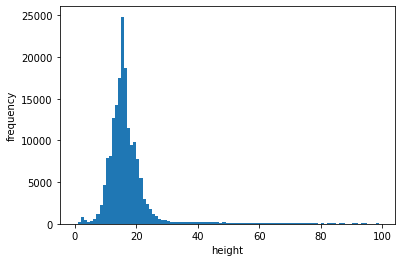

In [ ]:
all_heights = [
           height
           for data in [data for data in it0.metadata if data is not None]
           for height in data.height
]
plt.hist(all_heights, bins=list(range(100)))
plt.xlabel('height')
plt.ylabel('frequency');

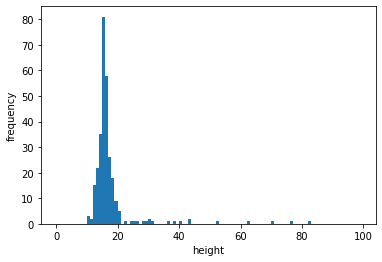

In [ ]:
median_heights = [
           data.height.median()
           for data in [data for data in it0.metadata if data is not None]
]
plt.hist(median_heights, bins=list(range(100)))
plt.xlabel('height')
plt.ylabel('frequency');

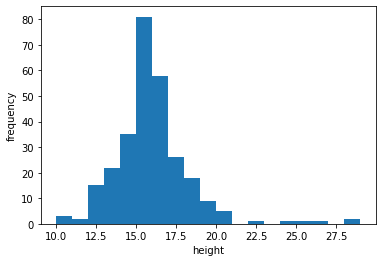

In [ ]:
plt.hist(median_heights, bins=list(range(10, 30)))
plt.xlabel('height')
plt.ylabel('frequency');

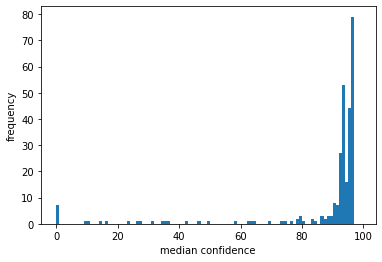

In [ ]:
median_confidences = [
           data.conf.median()
           for data in [data for data in it0.metadata if data is not None]
]
plt.hist(median_confidences, bins=list(range(100)))
plt.xlabel('median confidence')
plt.ylabel('frequency');

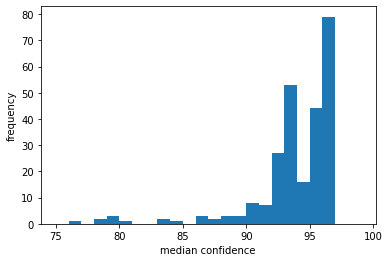

In [ ]:
plt.hist(median_confidences, bins=list(range(75, 100)))
plt.xlabel('median confidence')
plt.ylabel('frequency');

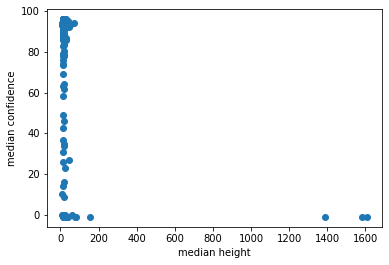

In [ ]:
plt.scatter(median_heights, median_confidences)
plt.xlabel('median height')
plt.ylabel('median confidence');

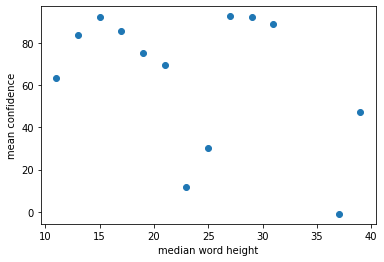

In [ ]:
movmeans = []
bins = []
for lower in list(range(10, 40, 2)):
  bin = [median_confidences[i] for i, height in enumerate(median_heights) if lower <= height <= lower+2]
  if bin:
    movmeans.append(sum(bin) / len(bin))
    bins.append(lower+1)
plt.scatter(bins, movmeans)
plt.ylabel('mean confidence')
plt.xlabel('median word height');

The above is worth comparing with [this result](https://groups.google.com/g/tesseract-ocr/c/Wdh_JJwnw94/m/24JHDYQbBQAJ).

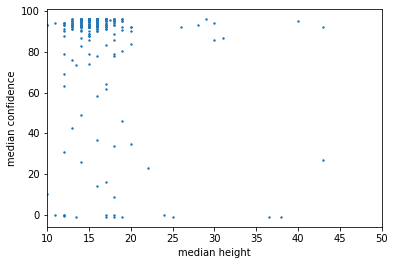

In [ ]:
plt.scatter(median_heights, median_confidences, s=2)
plt.xlabel('median height')
plt.ylabel('median confidence')
plt.xlim(10, 50);

The above indicates that it seems not uncommon that texts outside of the apparently optimal range are sometimes analyzed with high confidence.

# Iteration 1

In iteration 0, I found that a mostly correct result was sometimes being replaced by a completely incorrect result by the OSD-assisted analysis -- typically because the detected script or orientation was wrong. Here, I amend that by ensuring that results with moderate confidences are not replaced by results with lower confidences.

See [this spreadsheet](https://docs.google.com/spreadsheets/d/1SjVziDjYV4YPSSdjaHtBeGsaBVx-zjgcDK430V-aMrY/edit?usp=sharing) for the output.

In [ ]:
with open('development_sample_out3/analysis.pickle', 'rb') as dbfile:
  it1 = pickle.load(dbfile)
it1

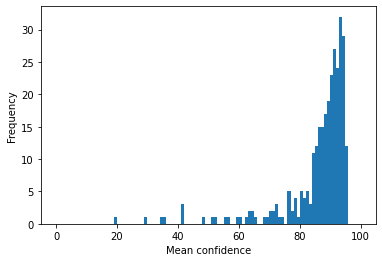

In [ ]:
plt.hist([conf for conf in it1.mean_confidences if conf is not None], bins=range(101))
plt.xlabel('Mean confidence')
plt.ylabel('Frequency');

In [ ]:
mean_confidences = list(
    conf for conf in it1.mean_confidences if not pd.isna(conf))
print('The mean wordwise confidence was {:.4f},\nthe mean pagewise confidence '
  'was {:.4f},\nand {} pages were analyzed with a confidence of less than '
  '75.'.format(
      statistics.mean(
          confidence
          for data in [data for data in it1.metadata if data is not None]
          for confidence in data.conf if confidence > -1
      ),
      statistics.mean(mean_confidences),
      sum(conf < 75 for conf in mean_confidences)
  ))

The mean wordwise confidence was 88.3453,
the mean pagewise confidence was 86.2748,
and 31 pages were analyzed with a confidence of less than 75.


This shows that there was a small improvement.

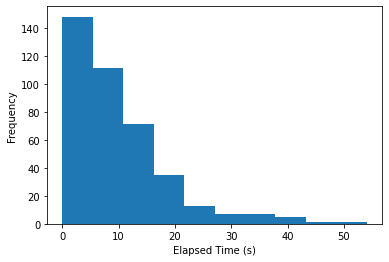

In [ ]:
times = [it1.times[i] - it1.times[i-1] for i in range(1, len(it1.times))]
plt.hist(times)
plt.xlabel('Elapsed Time (s)')
plt.ylabel('Frequency');

In [ ]:
statistics.mean(times)

9.366165890131978

## Iteration 2

Here, I arrange for the system to choose an empirically optimal image scale. The goal is to observe an accuracy improvement -- which can indirectly be observed with confidence scores (although one must, of course, be careful).

See [this spreadsheet](https://docs.google.com/spreadsheets/d/1LGHUcjmFuXFwDovforib0Sn7f9CqoLdhsELzhzS1CN8/edit?usp=sharing) for the output.

In [ ]:
with open('development_sample_out4/analysis.pickle', 'rb') as dbfile:
  it2 = pickle.load(dbfile)
it2

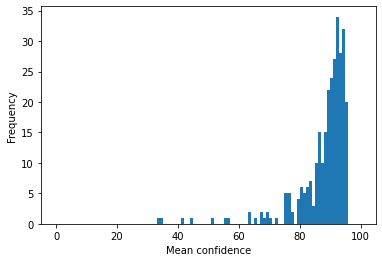

In [ ]:
plt.hist([conf for conf in it2.mean_confidences if conf is not None], bins=range(101))
plt.xlabel('Mean confidence')
plt.ylabel('Frequency');

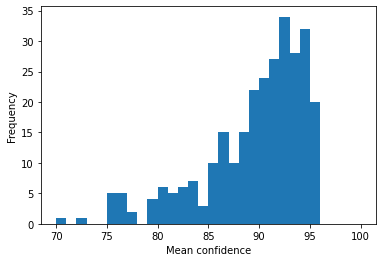

In [ ]:
plt.hist([conf for conf in it2.mean_confidences if conf is not None], bins=range(70, 101))
plt.xlabel('Mean confidence')
plt.ylabel('Frequency');

Right here, I think that I may see a subtle reflection of the special number 75: The value I chose in my program to be the cutoff between acceptable results and results that needed additional attention. Part of this "additional attention" is rescaling.

In [ ]:
mean_confidences = list(
    conf for conf in it2.mean_confidences if not pd.isna(conf))
print('The mean wordwise confidence was {:.4f},\nthe mean pagewise confidence '
  'was {:.4f},\nand {} pages were analyzed with a confidence of less than '
  '75.'.format(
      statistics.mean(
          confidence
          for data in [data for data in it2.metadata if data is not None]
          for confidence in data.conf if confidence > -1
      ),
      statistics.mean(mean_confidences),
      sum(conf < 75 for conf in mean_confidences)
  ))

The mean wordwise confidence was 89.0195,
the mean pagewise confidence was 87.9094,
and 17 pages were analyzed with a confidence of less than 75.


Confidence scores increased.

There was also a marked decrease in the number of pages that were analyzed with very low confidence. 17 pages out of 400 is only 4.25%. However, this may have occurred partly because failures may not be registered if no words or only easy words are detected while difficult words are ignored. I think this suggests that the metric that I use to determine the "goodness" of a result needs to be revised.

In [ ]:
print(it2.metadata[90])

   level  page_num  block_num  par_num  line_num  ...  top  width  height  conf  text
0      1         1          0        0         0  ...    0    902     686    -1   NaN
1      2         1          1        0         0  ...    0    684     686    -1   NaN
2      3         1          1        1         0  ...    0    684     686    -1   NaN
3      4         1          1        1         1  ...    0    684     686    -1   NaN
4      5         1          1        1         1  ...    0    684     686    95      

[5 rows x 12 columns]


Whitespace shouldn't be included in the confidence estimates. If there's nothing but whitespace, the confidence should be zero. [DONE]

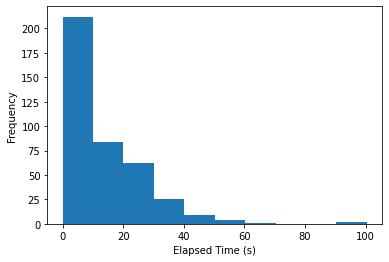

In [ ]:
times = [it2.times[i] - it2.times[i-1] for i in range(1, len(it2.times))]
plt.hist(times)
plt.xlabel('Elapsed Time (s)')
plt.ylabel('Frequency');

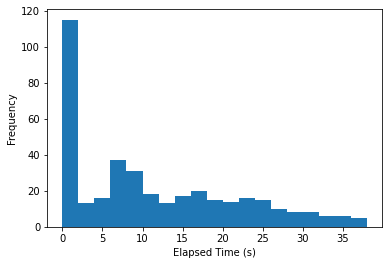

In [ ]:
plt.hist(times, bins=range(0, 40, 2))
plt.xlabel('Elapsed Time (s)')
plt.ylabel('Frequency');

In [ ]:
statistics.mean(times)

12.974709617762937

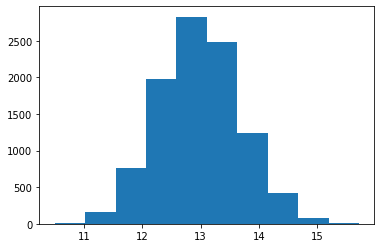

In [ ]:
import random
time_means = list()
for _ in range(10000):
  time_means.append(statistics.mean(random.choices(times, k=len(times))))
plt.hist(time_means);

However, the mean time to analyze a text has increased. I would for like it to be closer to 9 seconds per page.
* Do not re-do just because of the letter height if the confidence is already good (above, say, 90). [DONE]
* Take your initial scale back down to 1.5 [TODO (tentative)]

For transparency, I should note that 9 seconds per page is about the time it takes for Tesseract to analyze a page without any of the tricks I have been using to try to improve accuracy. The number, 9 seconds, was chosen because I want to be more accurate than the vanilla usage of Tesseract without being slower.

I will also probably omit words that have extremely low confidence -- I think that will reduce the Jaccard distance. So, if confidence is less than, say, 40 (I should probably determine the number empirically), then I will just leave out the word and perhaps replace it with two newlines so that artificial bigrams are not formed. [TODO]

I caught a bug while I was reading the output. In the `rotate` function, I was missing `expand=True`, and so words were being cut off. [DONE]

In the future, I may also want to aim for a median word height 30 pixels instead of 15. [TODO (tentative)]

In [ ]:
pd.array([1, 1, 1, 0], dtype='bool') & pd.array([0, 1, 1, 1], dtype='bool')

<PandasArray>
[False, True, True, False]
Length: 4, dtype: bool

In [ ]:
pd.isna(it2.metadata[90].text[4])

False

## Iteration 3

Fix orientation bug, change confidence metric to exclude whitespace.

See [this spreadsheet](https://docs.google.com/spreadsheets/d/1i-goSXBWIcWnf1hB78vrkEKYmfVu_Een6SJ0J-3TbCA/edit?usp=sharing) for the output.

In [ ]:
with open('development_sample_out5/analysis.pickle', 'rb') as dbfile:
  it3 = pickle.load(dbfile)
it3

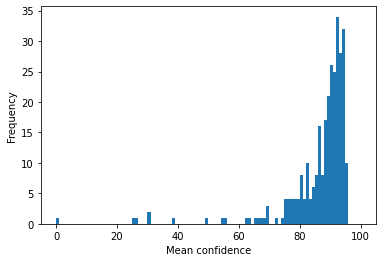

In [ ]:
plt.hist([conf for conf in it3.mean_confidences if conf is not None], bins=range(101))
plt.xlabel('Mean confidence')
plt.ylabel('Frequency');

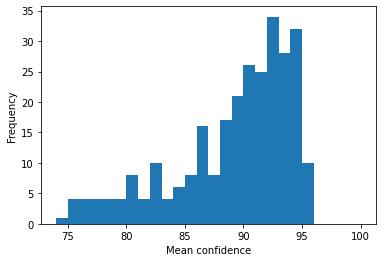

In [ ]:
plt.hist([conf for conf in it3.mean_confidences if conf is not None], bins=range(74, 101))
plt.xlabel('Mean confidence')
plt.ylabel('Frequency');

In [ ]:
mean_confidences = list(
    conf for conf in it3.mean_confidences if not pd.isna(conf))
print('The mean wordwise confidence was {:.4f},\nthe mean pagewise confidence '
  'was {:.4f},\nand {} pages were analyzed with a confidence of less than '
  '75.'.format(
      statistics.mean(
          confidence
          for data in [data for data in it3.metadata if data is not None]
          for confidence in data.conf if confidence > -1
      ),
      statistics.mean(mean_confidences),
      sum(conf < 75 for conf in mean_confidences)
  ))

The mean wordwise confidence was 88.9157,
the mean pagewise confidence was 86.8028,
and 20 pages were analyzed with a confidence of less than 75.


I calculate the pagewise confidence using the previous metric to show that it is also about the same:

In [ ]:
statistics.mean(
    data.conf[data.conf >= 0].mean()
    for data in [data for data in it3.metadata if data is not None]
)

87.39070213497254

The metrics make the current iteration look slightly worse, but I suspect that this is because the metrics are more honest.

In [ ]:
times = list(it3.times[i] - it3.times[i-1] for i in range(1, len(it3.times)))
statistics.mean(times)

10.775398997137122

I have no idea why the average elapsed time went down.

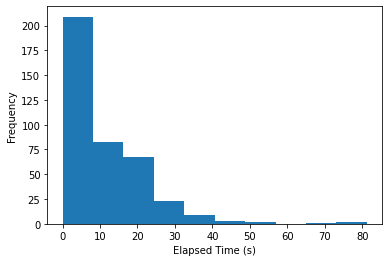

In [ ]:
plt.hist(times)
plt.xlabel('Elapsed Time (s)')
plt.ylabel('Frequency');

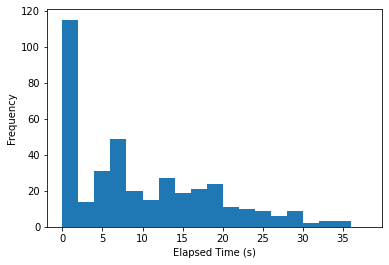

In [ ]:
plt.hist(times, bins=range(0, 40, 2))
plt.xlabel('Elapsed Time (s)')
plt.ylabel('Frequency');

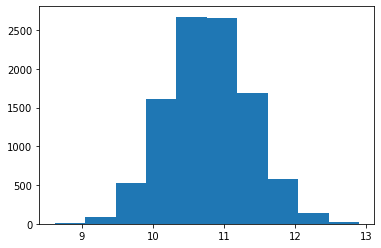

In [ ]:
import random
time_means = list()
for _ in range(10000):
  time_means.append(statistics.mean(random.choices(times, k=len(times))))
plt.hist(time_means);

This is unexpected, and qualitatively speaking, it doesn't look like it happened randomly. However, it might not be replicable: Maybe Google Colab was for some reason running faster during one runtime than in another, maybe because of how resources were being allocated behind the scenes.

In [ ]:
with open('development_sample_out6/analysis.pickle', 'rb') as dbfile:
  it3_2 = pickle.load(dbfile)
it3_2
times2 = list(it3_2.times[i] - it3_2.times[i-1] for i in range(1, len(it3_2.times)))
statistics.mean(times2)

12.021645559105359

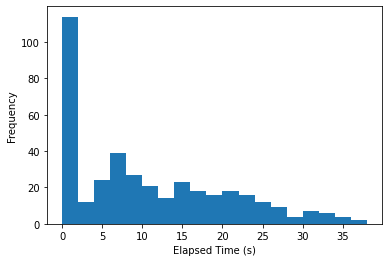

In [ ]:
plt.hist(times2, bins=range(0, 40, 2))
plt.xlabel('Elapsed Time (s)')
plt.ylabel('Frequency');

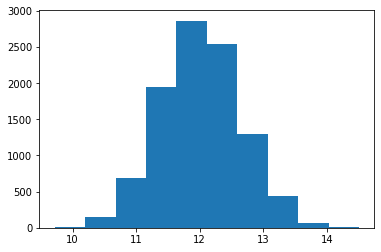

In [ ]:
import random
time_means2 = list()
for _ in range(10000):
  time_means2.append(statistics.mean(random.choices(times2, k=len(times2))))
plt.hist(time_means2);

In [ ]:
abs_diff_of_means = abs(statistics.mean(times2) - statistics.mean(times))
abs_diff_of_means

1.2462465619682366

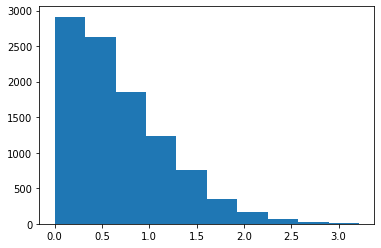

In [ ]:
boot_diffs_of_means = list()
combined = times + times2
for _ in range(10000):
  boot_diffs_of_means.append(abs(
      statistics.mean(random.choices(combined, k=len(times2)))
      - statistics.mean(random.choices(combined, k=len(times)))
  ))
plt.hist(boot_diffs_of_means);

After this, I still do not know whether time trial results are replicable. I have not rejected the null.

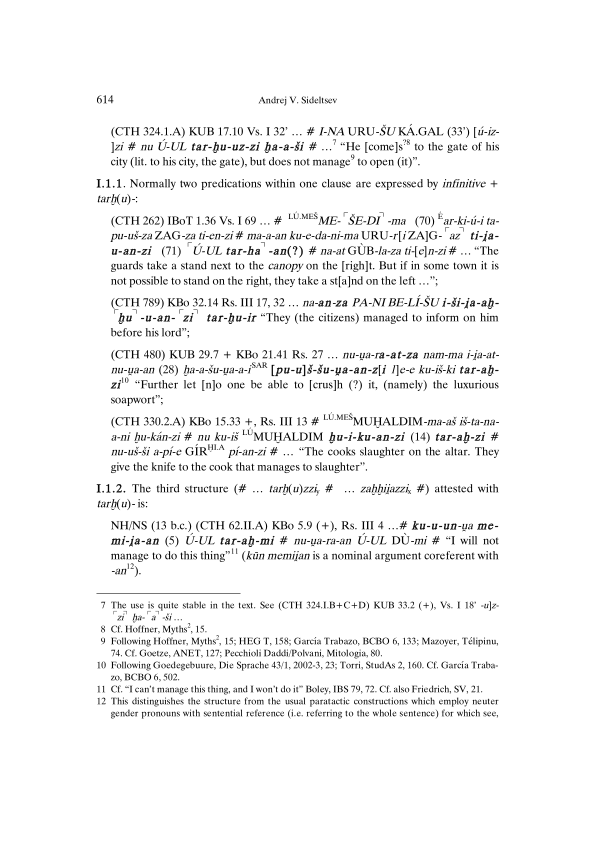

In [ ]:
import fitz
from PIL import Image
doc = fitz.open('development_sample.pdf')
def image(document, page_number, resolution=5):
  pix = document.get_page_pixmap(
      page_number, matrix=fitz.Matrix(resolution, resolution))
  return Image.frombytes(
      ("RGBA" if pix.alpha else "RGB"),
      [pix.width, pix.height], pix.samples
      )
image(doc, 8, 1)

In [ ]:
doc.load_page(8).get_text('words')

[(258.4800109863281,
  96.43009185791016,
  339.10400390625,
  105.4238510131836,
  '��������������������',
  0,
  0,
  0),
 (96.4800033569336,
  94.94401550292969,
  113.71200561523438,
  105.9120101928711,
  '���',
  0,
  1,
  0),
 (110.63999938964844,
  127.10398864746094,
  500.9519958496094,
  138.07199096679688,
  '���������������������������������������������������������������������',
  1,
  0,
  0),
 (110.63999938964844,
  141.98399353027344,
  127.31999969482422,
  152.95199584960938,
  '����',
  1,
  1,
  0),
 (127.44000244140625,
  141.98399353027344,
  190.9199981689453,
  152.95199584960938,
  '����������',
  1,
  1,
  1),
 (190.12200927734375,
  141.98399353027344,
  264.3599853515625,
  152.95199584960938,
  '�������������',
  1,
  1,
  2),
 (263.5619812011719,
  141.98399353027344,
  308.2799987792969,
  152.95199584960938,
  '��������',
  1,
  1,
  3),
 (308.3999938964844,
  137.662353515625,
  501.57598876953125,
  152.95199584960938,
  '���7�������������8������������

In [ ]:
text = doc.load_page(8).get_text()

In [ ]:
type(text)

str

In [ ]:
text.translate('eng')

'��������������������\n���\n���������������������������������������������������������������������\n���� ���������� ������������� �������� ���7�������������8��������������������\n������������������������������������������������������9����������������\n�\n���������������������������������������������������������������������������������\n�����������\n�������������������������������������������\n�\n�����\n�\n������������������������\n��������������������������������������������������������������\n�\n��\n�\n�������\n��������������\n�\n�����������\n�\n���������������������������������������������\n���������������������������������������������������������������������������������\n������������������������������������������������������������������������\n�\n�������������������������������������������������������������������������\n���\n�������\n���\n�� ��������������������������������������������������������\n������������������\n�\n���������������������������������������������������������������

In [ ]:
text.encode('utf-8')

b'\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd\n\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd\n\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\x

## Iteration 4

This time I tried to focus only on speed.

However, there was another issue which I was compelled to fix. Some pages had nonstandard character encodings, which forced me to render and then OCR them, even though there were no images. Before, I had just been extracting "�" from those pages -- that is the Unicode placeholder character.

See [this spreadsheet](https://docs.google.com/spreadsheets/d/1axFFRIwsCmtU5iZ5LXStwE9m5P-u_FitzuZvui73hVU/edit?usp=sharing) for the output.

UPDATE: the code I had added to address the corrupted pages (with "�" symbols) had a logical bug that I think has been fixed. The result is that the "�" symbols are still in the above spreadsheet, but from now on I think they have been addressed.

I am pleased to observe that the small speed optimizations that I made did not appreciably reduce confidence scores, which are my indirect way of predicting accuracy. It seems possible that the only reason why the previous iteration had higher confidence scores may have been simply that I was doing more analyses and choosing from the best, according to confidence score -- not that I was necessarily seeing real improvement in terms of ground-truth accuracy.

In [ ]:
with open('development_sample_out7/analysis.pickle', 'rb') as dbfile:
  it4 = pickle.load(dbfile)
it4

In [ ]:
mean_confidences = list(
    conf for conf in it4.mean_confidences if not pd.isna(conf))
print('The mean wordwise confidence was {:.4f},\nthe mean pagewise confidence '
  'was {:.4f},\nand {} pages were analyzed with a confidence of less than '
  '75.'.format(
      statistics.mean(
          confidence
          for data in [data for data in it4.metadata if data is not None]
          for confidence in data.conf if confidence > -1
      ),
      statistics.mean(mean_confidences),
      sum(conf < 75 for conf in mean_confidences)
  ))

The mean wordwise confidence was 88.6046,
the mean pagewise confidence was 86.6851,
and 19 pages were analyzed with a confidence of less than 75.


In [ ]:
times = list(it4.times[i] - it4.times[i-1] for i in range(1, len(it4.times)))
statistics.mean(times)

9.435988260689834

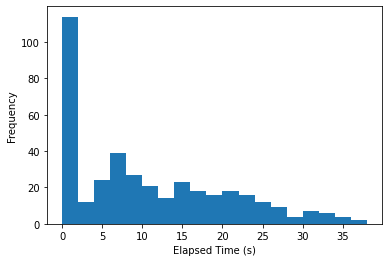

In [ ]:
plt.hist(times2, bins=range(0, 40, 2))
plt.xlabel('Elapsed Time (s)')
plt.ylabel('Frequency');

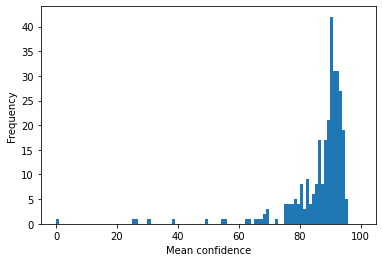

In [ ]:
plt.hist([conf for conf in it4.mean_confidences if conf is not None], bins=range(101))
plt.xlabel('Mean confidence')
plt.ylabel('Frequency');

mupdf: expected string or endbfrange


(array([1.11e+03, 3.98e+02, 5.90e+01, 1.30e+01, 8.00e+00, 2.00e+00,
        1.00e+00, 3.00e+00, 0.00e+00, 1.00e+00]),
 array([    0. ,  2908.2,  5816.4,  8724.6, 11632.8, 14541. , 17449.2,
        20357.4, 23265.6, 26173.8, 29082. ]),
 <a list of 10 Patch objects>)

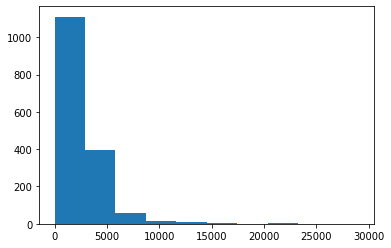

In [ ]:
import fitz
large_sample = fitz.open('large_sample.pdf')
lengths = list()
for page in large_sample:
  lengths.append(len(page.get_text()))
plt.hist(lengths)

In [ ]:
original_text = '�������������������������'
len([a for a in original_text if a == '�'])

25

## Iteration 5

Here, I replace langdetect with CLD3 as the language detection mechanism.

See [this spreadsheet](https://docs.google.com/spreadsheets/d/1fDODNRPd_Gm6OD76MBCup3xnAMYVsp2FFIDPrXunpoU/edit?usp=sharing) for the output.

We see a slight decrease in the proxy performance measurements. This slight decrease is probably not statistically significant, but it is not the increase in performance that was hoped for. This run has provided no evidence that the new language detector offered improvement of any sort.

In [ ]:
src = 'development_sample.pdf'
out = 'development_sample_out8'
Text(src, out).save_ocr()

/content/drive/.shortcut-targets-by-id/1W2EROe2FItlaK99U-WY_qaBOc2UD_LI0/AWCA/Colab_notebooks/OCR/pDonovan/awca-ocr/tesseract_manager.py:247: UserWarning: Failed to analyze image.
  warnings.warn('Failed to analyze image.')

/content/drive/.shortcut-targets-by-id/1W2EROe2FItlaK99U-WY_qaBOc2UD_LI0/AWCA/Colab_notebooks/OCR/pDonovan/awca-ocr/tesseract_manager.py:247: UserWarning: Failed to analyze image.
  warnings.warn('Failed to analyze image.')

/content/drive/.shortcut-targets-by-id/1W2EROe2FItlaK99U-WY_qaBOc2UD_LI0/AWCA/Colab_notebooks/OCR/pDonovan/awca-ocr/tesseract_manager.py:303: UserWarning: OCR failed: (1, 'Error opening data file /usr/share/tesseract-ocr/4.00/tessdata/dan_frak.traineddata Please make sure the TESSDATA_PREFIX environment variable is set to your "tessdata" directory. Failed loading language \'dan_frak\' Tesseract couldn\'t load any languages! Could not initialize tesseract.')
  warnings.warn('OCR failed: ' + str(e))

/content/drive/.shortcut-targets-by-id/1W2EROe

DEBUG: No language found corresponding to iw


/content/drive/.shortcut-targets-by-id/1W2EROe2FItlaK99U-WY_qaBOc2UD_LI0/AWCA/Colab_notebooks/OCR/pDonovan/awca-ocr/tesseract_manager.py:247: UserWarning: Failed to analyze image.
  warnings.warn('Failed to analyze image.')

/content/drive/.shortcut-targets-by-id/1W2EROe2FItlaK99U-WY_qaBOc2UD_LI0/AWCA/Colab_notebooks/OCR/pDonovan/awca-ocr/tesseract_manager.py:247: UserWarning: Failed to analyze image.
  warnings.warn('Failed to analyze image.')

/content/drive/.shortcut-targets-by-id/1W2EROe2FItlaK99U-WY_qaBOc2UD_LI0/AWCA/Colab_notebooks/OCR/pDonovan/awca-ocr/tesseract_manager.py:303: UserWarning: OCR failed: (1, 'Tesseract Open Source OCR Engine v4.0.0-beta.1 with Leptonica Warning. Invalid resolution 0 dpi. Using 70 instead. Estimating resolution as 717 Too few characters. Skipping this page Too few characters. Skipping this page Error during processing.')
  warnings.warn('OCR failed: ' + str(e))

/content/drive/.shortcut-targets-by-id/1W2EROe2FItlaK99U-WY_qaBOc2UD_LI0/AWCA/Colab_not

In [ ]:
with open('development_sample_out8/analysis.pickle', 'rb') as dbfile:
  it5 = pickle.load(dbfile)
it5

In [ ]:
mean_confidences = list(
    conf for conf in it5.mean_confidences if not pd.isna(conf)
)
print('The mean wordwise confidence was {:.4f},\nthe mean pagewise confidence '
  'was {:.4f},\nand {} pages were analyzed with a confidence of less than '
  '75.'.format(
      statistics.mean(
          confidence
          for data in [data for data in it5.metadata if data is not None]
          for confidence in data.conf if confidence > -1
      ),
      statistics.mean(mean_confidences),
      sum(conf < 75 for conf in mean_confidences)
  ))

The mean wordwise confidence was 88.5881,
the mean pagewise confidence was 86.5226,
and 21 pages were analyzed with a confidence of less than 75.


In [ ]:
times = list(it5.times[i] - it5.times[i-1] for i in range(1, len(it5.times)))
statistics.mean(times)

9.986262056761817

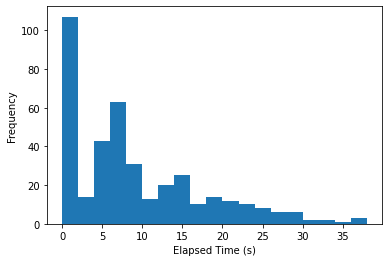

In [ ]:
plt.hist(times, bins=range(0, 40, 2))
plt.xlabel('Elapsed Time (s)')
plt.ylabel('Frequency');

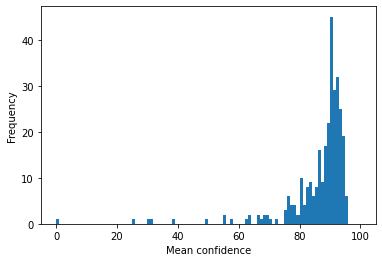

In [ ]:
plt.hist([conf for conf in it5.mean_confidences if conf is not None], bins=range(101))
plt.xlabel('Mean confidence')
plt.ylabel('Frequency');

From a qualitative inspection of the output, it seems that CLD3 is more inclusive than `langdetect` in the sense that it is more likely to guess an uncommon language (especially Maltese -- it seems weirdly likely to guess Maltese). The two disagreed with each other about 10% of the time, and it is still not obvious which of the two is less wrong.

It is worth noting, however, that this may just reflect the expansion of the list of possible languages to include more than just the ones that we know are in the corpus. So it may well be the case that the two language detectors are actually contributing nothing at all to the difference that is being observed here.

## Iteration 6

Here I finally support multilingual OCR for multilingual pages. See [this spreadsheet](https://docs.google.com/spreadsheets/d/1L2r3fLkehHenBln4oYMwaClk-sn3mJBDbQMl0XAerok/edit?usp=sharing) for notes and [this folder](https://drive.google.com/drive/folders/15uNVCldUTGbJRtuKTi0jeBpXal6thlzr?usp=sharing) for output. (Two runs were necessary due to an error while saving some data from the first run.)

* On page 8, we have some text that is small and mixed-language. It's mostly German. We go to the max recursion depth, however, because when CLD3 sees the entire text, it recognizes it as German, but when it sees smaller sections of it, it sees no German, and instead Luxembourgish, French, etc. (and because the algorithm repeatedly demands more magnification).
* In cases where it simply is not natural language, the algorithm wastes time trying different languages. It's hopeless. These strings of numbers, letters, etc. will not be recognized any better if you assume that they are some other language.
* It probably shouldn't be possible for the detected language to not even have the same script as the script being used for OCR.
* There is sometimes an undesirable offset between where the language switches from one language to another and where the annotations switch.
* The time cost to this change is serious, I think. Sometimes multiple passes are being performed over nearly the same text. There should be a way to address the cases when we are unable to erase much text in one go -- the max recursion depth should decrease by multiple steps in response to that.
* Again -- priors. Maltese is probably not the language!
* At least sometimes, however, the annotations actually do correctly catch switches from one language to another. Page 245 is probably one example of this.
* Page 259 is probably an example of a case where we are simply wasting time.

In [4]:
src = 'development_sample.pdf'
out = 'development_sample_out10'
Text(src, out, verbose=True).save_ocr()

0 out of 400 pages analyzed in 0.00 seconds...
1 out of 400 pages analyzed in 9.70 seconds...
Retrying. Language=eng, scale=2.2604
The following text has mixed languages:
346->eng Trauma->eng and->eng Shock->eng **If->eng a->eng person’s->eng lips->eng are->eng ‘thickened’.->eng .->eng .->eng If->eng (a->eng person’s->eng lips->eng are->eng thickened->eng and)->eng his->eng lip->eng is->eng broken...->eng 14.2->eng DISNA->eng asi-da-si->eng purrwur...(AMT75/1+->eng iv->eng 17)->eng **Ifa->eng person’s->ita heels->ita were->ita bored->ita into...->ita 14.3->ita DISNA->ita a-si-da-sti->ita luut-ta-a...->ita (AMT75/1+->ita iv->ita 19)->ita **Ifa->ita person’s->ita heels->ita were->ita split...->ita SEVERE->ita FACIAL->ita AND->ceb HEAD->ceb INJURY->ceb 14.4->ceb DIS->ceb SA->ceb SAG.KL-t->ceb [..->ceb .]x->ceb zi-iz->ceb DIS->ceb KUM-im->eng SILIM-ma->eng DIN->eng /->eng DIS->eng SA->eng SAG.KL3ti->eng 2i-iz->eng uGI,->eng GIG-su->eng DUGUD->eng GABA.RI->eng SIG-is->eng (DPS->eng IV->eng 

/content/drive/.shortcut-targets-by-id/1W2EROe2FItlaK99U-WY_qaBOc2UD_LI0/AWCA/Colab_notebooks/OCR/pDonovan/awca-ocr/tesseract_manager.py:251: UserWarning: Failed to analyze image.
  warnings.warn('Failed to analyze image.')



21 out of 400 pages analyzed in 303.45 seconds...
First guess at orientation + language failed.
Retrying. Language=deu, scale=1.9375
22 out of 400 pages analyzed in 388.64 seconds...
23 out of 400 pages analyzed in 388.65 seconds...
First guess at orientation + language failed.
Retrying. Language=mlt, scale=2.7125
The following text has mixed languages:
 ->eng AND->eng GRAMMATICAL->eng TEXTS->eng SOME->eng EXPLANATORV->eng LISTS->eng  ->eng Ko->eng 11193->eng K.->ukr 11169->ukr Obverse->ukr Obverse->ukr K->ukr 11196->hat Obverse->hat K.->hat 11206->hat (Ibverse->fry prNnenm->hat primi->hat b->hat
Retrying. Language=eng, scale=2.8029
24 out of 400 pages analyzed in 404.90 seconds...
Retrying. Language=eng, scale=3.3906
25 out of 400 pages analyzed in 435.35 seconds...
26 out of 400 pages analyzed in 435.36 seconds...
27 out of 400 pages analyzed in 435.37 seconds...
28 out of 400 pages analyzed in 435.38 seconds...
Retrying. Language=eng, scale=1.0433
29 out of 400 pages analyzed in 454

/content/drive/.shortcut-targets-by-id/1W2EROe2FItlaK99U-WY_qaBOc2UD_LI0/AWCA/Colab_notebooks/OCR/pDonovan/awca-ocr/tesseract_manager.py:251: UserWarning: Failed to analyze image.
  warnings.warn('Failed to analyze image.')



52 out of 400 pages analyzed in 714.92 seconds...
53 out of 400 pages analyzed in 723.59 seconds...
Retrying. Language=eng, scale=1.9375
54 out of 400 pages analyzed in 742.52 seconds...
55 out of 400 pages analyzed in 750.96 seconds...
56 out of 400 pages analyzed in 750.97 seconds...
57 out of 400 pages analyzed in 750.98 seconds...
58 out of 400 pages analyzed in 760.03 seconds...
59 out of 400 pages analyzed in 776.90 seconds...
Retrying. Language=eng, scale=1.5956
60 out of 400 pages analyzed in 801.42 seconds...
First guess at orientation + language failed.
Retrying. Language=eng, scale=3.1000
The following text has mixed languages:
510->eng CURRENT->eng ANTHROPOLOGY->eng  ->eng  ->eng TABLE->eng I->eng (Continued)->eng I-sigma->eng Site->eng Sample->eng  Uncal.->eng Bp.->eng cal.->eng bic.->eng Range->eng Intercepts->eng Material->eng Source->eng Context->eng Shiqmim.->eng RT-859B->eng 5,460->eng +->eng 140->eng 4330->eng 4530-3994->eng 4334->eng Charcoal->eng Levy->eng (1992:35

/content/drive/.shortcut-targets-by-id/1W2EROe2FItlaK99U-WY_qaBOc2UD_LI0/AWCA/Colab_notebooks/OCR/pDonovan/awca-ocr/tesseract_manager.py:251: UserWarning: Failed to analyze image.
  warnings.warn('Failed to analyze image.')



Retrying. Language=deu, scale=1.8083
The following text has mixed languages:
r->deu 55.->deu Zu->deu dieser->deu Nummer->deu bemerkt->deu Otten:->deu „Dupl.->deu zu->deu XVII->deu 66->deu b->deu 8->deu ff."->deu Letztere->deu Tafel->deu ist->deu aber->deu nach->deu dem->deu Vorwort->deu zu->deu diesen->deu Hefte->deu Dupl.->deu zu->deu VII->deu 60;->deu z.B.->deu 60->deu Rs.->deu 3->deu ff.->deu =->deu 66->deu b->deu 3->deu ff.->deu (man->deu darf->deu vermuten,->deu dass->deu es->deu nicht->deu 60->deu Rs,->deu sondern->deu 60->deu Vs->deu ist).->deu Dies->deu Stück->deu liegt->deu also->deu in->deu drei->deu Exemplaren->deu vor->deu (himmas->deu U.UL->deu dai->deu XXXII->deu 55->deu b->deu 7->deu =->deu XXVII->deu 60->deu b->deu 13->deu =->deu XXVII->deu &->deu b->deu 13->mlt etc.)->mlt 60->mlt a->mlt 4,->mlt 6,->mlt 9-itarkija->mlt c£_XXV->mlt L2->mlt b->mlt Ih:->mlt nat->mlt I.NA->mlt A.SAR->mlt itarki->mlt QA.DU->mlt DUG.LIS.GAL->mlt arha->mlt pessijänzi.->mlt p52-->mlt F->mlt 6,-

/content/drive/.shortcut-targets-by-id/1W2EROe2FItlaK99U-WY_qaBOc2UD_LI0/AWCA/Colab_notebooks/OCR/pDonovan/awca-ocr/tesseract_manager.py:251: UserWarning: Failed to analyze image.
  warnings.warn('Failed to analyze image.')



65 out of 400 pages analyzed in 1012.38 seconds...
66 out of 400 pages analyzed in 1020.08 seconds...
67 out of 400 pages analyzed in 1020.10 seconds...
Retrying. Language=deu, scale=1.8083
The following text has mixed languages:
G.->deu Kryszat->deu 2.->deu DER->deu FEHLENDE->deu BEL->deu ODER:->deu WELCHE->deu GOTTHEIT->deu IST->deu IN->deu Z.->deu 8->deu GENANNT?->deu Die->deu von->deu Eidem->deu in->deu vollem->deu Bewusstsein->deu der->deu Problematik->deu bereits->deu als->deu „very->deu tentative‘->deu bezeichnete->deu Lesung->deu Ü[UTU”]->deu A-su-ri-a->deu mit->deu der->deu Übersetzung->deu „Assyrian->deu Samas“->deu in->deu Z.8->deu ist->deu m.E.->deu zu->deu korrigieren.->deu Der->deu diesem->deu assyrischen->deu Gott->deu auf->deu der->deu Tell->deu Leilan-->deu Seite->deu zugeordnete->deu Gegenpart->deu ist->deu der->deu hier->deu Nergal,->deu König->deu (LUGAL)->deu von->deu Hubsel,->deu sonst->deu aber->deu auch->deu als->deu 32/->deu von->deu Hub$a/el,->deu bezeichnete-

/content/drive/.shortcut-targets-by-id/1W2EROe2FItlaK99U-WY_qaBOc2UD_LI0/AWCA/Colab_notebooks/OCR/pDonovan/awca-ocr/tesseract_manager.py:251: UserWarning: Failed to analyze image.
  warnings.warn('Failed to analyze image.')



76 out of 400 pages analyzed in 1266.55 seconds...
77 out of 400 pages analyzed in 1266.56 seconds...
78 out of 400 pages analyzed in 1275.67 seconds...
First guess at orientation + language failed.
Retrying. Language=nor, scale=1.3562
The following text has mixed languages:
Nevbabyiontoche->nor Kontabte->isl Nr.->isl 90-->isl g8->isl a->isl 91.->isl (VAT->isl 4960)->isl Fortsetzung->isl von->isl $.->isl 4.->isl Ra->isl uran->isl od->isl |->isl a->isl Kors->isl ELT->isl Ål->nor TT->nor ERR->nor G->nor VELT->nor VE->nor År->nor gr->nor å->nor ard->nor Va->nor pest->nor År->nor 4->nor gråt->nor ye->nor or->nor Ra->nor dte->nor br->nor ere->nor Add->nor 4->nor lp->nor z->nor EL->nor PET->nor NT->nor LØR->nor ET->nor HET->nor pa->nor METT->nor ST->nor JET->nor BE->nor VÅRT->nor O-RR->nor PHAT->nor TG->nor Jan->nor td->nor 8->nor JET->nor Derre->nor Har->nor Sgrena->nor Ed->nor GE->nor BERTE->nor TT->nor Å->nor Ge->nor Ja->nor on->nor gg->nor |->nor BERN->nor BE->nor BE->nor ag->nor TDI->no

/content/drive/.shortcut-targets-by-id/1W2EROe2FItlaK99U-WY_qaBOc2UD_LI0/AWCA/Colab_notebooks/OCR/pDonovan/awca-ocr/tesseract_manager.py:251: UserWarning: Failed to analyze image.
  warnings.warn('Failed to analyze image.')



79 out of 400 pages analyzed in 1309.10 seconds...
Retrying. Language=deu, scale=2.2604
The following text has mixed languages:
128->deu Note->deu brevi->deu  ->deu Zu->deu den->deu hurritischen->deu Verbformen->deu auf->deu -i=a:->deu eine->deu Berichtigung->deu In->deu meinem->deu Aufsatz->deu „Hurritisch->deu te-li-(i-)ip-pa->deu /->deu hethitisch->deu nu-->deu ...->deu ma-ak-nu-ut->deu in->deu der->deu hurritisch-hethitischen->deu Bilingue->deu aus->deu Bogazköy“->deu in->deu Th.->deu Richter->deu et->deu al.->deu [Hrsg.],->deu Kulturgeschichten.->deu Altorientalistische->deu Studien->deu für->deu Volkert->deu Haas->deu zum->deu 65.->deu Geburtstag,->deu Saarbrücken->deu 2001,->deu behauptete->deu ich->deu auf->deu S.->deu 126,->deu daß->deu „die->deu selten->deu verwendeten->deu ergativischen->deu Präsensformen->deu auf->deu -i=a->deu in->deu der->deu Bo.Bil->deu immer->deu richtig->deu mit->deu einem->deu hethitischen->deu Präsens->deu wiedergegeben->deu sind“'.->deu Bedauerliche

/content/drive/.shortcut-targets-by-id/1W2EROe2FItlaK99U-WY_qaBOc2UD_LI0/AWCA/Colab_notebooks/OCR/pDonovan/awca-ocr/tesseract_manager.py:251: UserWarning: Failed to analyze image.
  warnings.warn('Failed to analyze image.')



85 out of 400 pages analyzed in 1440.69 seconds...
86 out of 400 pages analyzed in 1452.66 seconds...
87 out of 400 pages analyzed in 1452.68 seconds...
88 out of 400 pages analyzed in 1465.47 seconds...
89 out of 400 pages analyzed in 1472.19 seconds...
90 out of 400 pages analyzed in 1472.20 seconds...
First guess at orientation + language failed.
91 out of 400 pages analyzed in 1489.99 seconds...
92 out of 400 pages analyzed in 1498.86 seconds...
93 out of 400 pages analyzed in 1498.87 seconds...
94 out of 400 pages analyzed in 1507.94 seconds...
First guess at orientation + language failed.
Retrying. Language=deu, scale=2.5833
The following text has mixed languages:
198->deu Indices->deu muslälu->deu Sa->deu gereb->deu ekalli->deu Baltill,das->deu muslähı->deu des->deu Palastes->deu von->deu Baltil“->deu 183-184,->deu 184-187->deu Patti-tuhdil,„Kanal->mlt des->mlt Überflusses“->mlt 146f.,->mlt 155-157->mlt i->mlt närti->mlt 3a->mlt ekalläti->mlt „Mündung->mlt des->mlt Kanals->swe d

/content/drive/.shortcut-targets-by-id/1W2EROe2FItlaK99U-WY_qaBOc2UD_LI0/AWCA/Colab_notebooks/OCR/pDonovan/awca-ocr/tesseract_manager.py:251: UserWarning: Failed to analyze image.
  warnings.warn('Failed to analyze image.')



110 out of 400 pages analyzed in 2009.26 seconds...
Retrying. Language=deu, scale=2.0865
The following text has mixed languages:
218->deu Runour->deu NAUMANN->deu Die->deu vier->deu Blöcke->deu wurden->deu nach->deu Sivas->deu gebracht->deu und->deu sind->deu jetzt->deu im->deu dortigen->deu Museum->deu in->deu ihrer->deu ursprünglichen->deu Zusammengehörigkeit->deu über-->deu einander->deu aufgestellt.->deu Hierbei->deu hat->deu sich->deu eine->deu Gesamthöhe->deu von->deu 2,27->deu m->deu er-->deu geben;->deu die->deu Frontseite->deu in->deu Höhe->deu des->deu Bergmotivs->deu hat->deu 0,46->deu m->deu Breite®.->deu Beim->deu Zerteilen->deu der->deu Stele->deu und->deu bei->deu der->deu Ausarbeitung->deu der->deu Mulden->deu sind->deu Teile->deu der->deu Ränder->deu ausgebrochen,->deu so->deu daß->deu zwischen->deu den->deu Blöcken->deu verschieden->deu breite->deu Lücken->deu verbleiben,->deu doch->deu dürfte->deu die->deu Aufstellung->deu im->deu Museum->deu ungefähr->deu zutreffen®

/content/drive/.shortcut-targets-by-id/1W2EROe2FItlaK99U-WY_qaBOc2UD_LI0/AWCA/Colab_notebooks/OCR/pDonovan/awca-ocr/tesseract_manager.py:251: UserWarning: Failed to analyze image.
  warnings.warn('Failed to analyze image.')



117 out of 400 pages analyzed in 2127.01 seconds...
Retrying. Language=eng, scale=2.0865
The following text has mixed languages:
26->eng JOURNAL->eng OF->eng CuNzEIFoRM->eng Srupigs,->eng Vou.->eng 24->eng (1971)->eng (5)->eng with->eng which->eng Sue(n)dada->eng released->eng (4)->eng ASurbel-->eng malkim’s->eng son->eng (named)->eng Kinua->eng (6-7)->eng Asurbelmalkim->cym owes->cym (8-9)->cym Sue(n)dada.->cym (10)->eng From->eng the->eng hamustu->eng of->eng (11-12)->eng Alahum->eng and->eng Basia->eng (13)->eng in->eng 13->eng Lamustu-->eng periods->eng (14)->eng he->eng shall->eng weigh->eng (the->eng silver);->eng if->eng (15)->eng he->eng does->eng not->eng weigh->eng (it)->eng (17)->eng interest->eng will->eng be->eng added->eng (16)->eng according->eng to->eng the->eng karum’s->eng regulation.->eng Month->eng (of)->eng (18)->eng Kanwarta->eng (19)->eng limu->eng (of)->jav (20)->jav Sukalia->jav (21)->cos rabim(?)->cos Mennanum:->cos (22)->cos in->cos the->cos presence->cos of-

/content/drive/.shortcut-targets-by-id/1W2EROe2FItlaK99U-WY_qaBOc2UD_LI0/AWCA/Colab_notebooks/OCR/pDonovan/awca-ocr/tesseract_manager.py:251: UserWarning: Failed to analyze image.
  warnings.warn('Failed to analyze image.')



First guess at orientation + language failed.
Retrying. Language=afr, scale=0.7535
The following text has mixed languages:
XIE.->ron 3843;->nld XIE->nld 440->nld Isuran,->nld  ->nld  ->nld EX->nld F->nld 2->cat UE->cat Kb->cat IE->cat LH->cat ae->cat M->cat M->cat NU->cat A->cat [LH->cat M]->cat AY->cat de->cat —->cat =K->cat A->cat D->cat Ze->cat IPS->cat (A->cat Ye->cat de->cat D->cat de->cat [PES->cat ENT->cat de->cat ©->cat DB->fra ZE->fra —->fra  ->fra  ->fra  ->fra  ->fra  ->fra ed->fra DE->fra Œ->fra —->fra dl->fra B*->fra He->fra IPS->fra EN->fra de->fra À->fra SH->fra D->fra E->fra Es->fra 4->fra MP->fra LKR->fra à->fra —->fra Ex->fra [l]->fra H->fra Dee->fra AR->fry A->fry D->fry IN->fry DEN->fry EN->fry —->fry À->fry =K->fry 4->fry E->fra Mn->fra Eh->fra K->fra &->fra Dis->fra DS->fra Ur->fra de->fra —->fra D->fra 4e->fra IFR->fra HS->fra dr->fra shlA->fra B->fra RU->fra Er->fra |->fra ES->fra F->fry %->fry Us->fry +->fry If->fry »#->fry 2->fry K->fry He->fry Bb->fry k->fry 

/content/drive/.shortcut-targets-by-id/1W2EROe2FItlaK99U-WY_qaBOc2UD_LI0/AWCA/Colab_notebooks/OCR/pDonovan/awca-ocr/tesseract_manager.py:251: UserWarning: Failed to analyze image.
  warnings.warn('Failed to analyze image.')



Retrying. Language=deu, scale=2.2604
The following text has mixed languages:
274->deu Besprechungen->deu der->deu -->deu auch->deu wenn->deu sie->deu deutlich->deu sozjal->deu konstruiert->deu sind->deu -->deu so->deu schwer->deu aufzubrechen->deu und->deu zu->deu verändern.->deu Ihre->deu Bedeutung->deu bewirkt->deu zudem->deu ein->deu hohes->deu Maß->deu an->deu politischer->deu Instrumentierbarkeit,->deu eine->deu politische->deu Funktion.->deu Dabei->deu ist->deu es->deu von->deu augenfälliger->deu Wichtigkeit,->deu daß->deu --->deu auch->deu unter->deu diesem->deu Blickwinkel->deu der->deu strukturierenden->deu Gewalt->deu der->deu Sprache->deu --->deu diese->deu Wirkung->deu wechselseitig->deu ist.->deu Bemerkenswert->deu —->deu vor->deu allem->deu im->deu Vergleich->deu mit->deu der->deu sumerischen->deu Sprache->deu --->deu ist->deu denn->deu auch->deu Strecks->deu Ergebnis,->deu daß->deu im->deu Akkadischen->deu „keineswegs,->deu wie->deu vermutet,->deu nur->deu der->deu Inhal

/content/drive/.shortcut-targets-by-id/1W2EROe2FItlaK99U-WY_qaBOc2UD_LI0/AWCA/Colab_notebooks/OCR/pDonovan/awca-ocr/tesseract_manager.py:251: UserWarning: Failed to analyze image.
  warnings.warn('Failed to analyze image.')



223 out of 400 pages analyzed in 3872.95 seconds...
224 out of 400 pages analyzed in 3884.41 seconds...
225 out of 400 pages analyzed in 3884.42 seconds...
226 out of 400 pages analyzed in 3884.43 seconds...
Retrying. Language=slv, scale=1.6953
227 out of 400 pages analyzed in 3886.79 seconds...
228 out of 400 pages analyzed in 3894.10 seconds...
Retrying. Language=deu, scale=2.0865
The following text has mixed languages:
Ein->deu Itenerar->deu aus->deu Dür-Katlimmu->deu 28ı->deu 'Die->deu buradu-Truppe->deu wird->deu von->deu Taidi->deu Zabmarschieren.->deu ?Am->deu Marirte-Fluß->deu *wird->deu sie->deu übernach-->deu ten.->deu Vom->deu ditto,->deu Sin->deu Makrisi->deu wird->deu sie->deu übernachten.->deu Von->deu ditto,->deu ”in->deu Naprasi->deu ®wird->deu sie->deu übernachten.->deu Von->deu ditto,->deu !Pin->deu Latihi->deu !!wird->deu sie->deu übernachten’->deu !?Von->deu ditto,->deu in->deu Qattun->deu "wird->deu sie->deu übernachten.->deu Von->deu Qattun->deu "nach->deu Dür-Kat

/content/drive/.shortcut-targets-by-id/1W2EROe2FItlaK99U-WY_qaBOc2UD_LI0/AWCA/Colab_notebooks/OCR/pDonovan/awca-ocr/tesseract_manager.py:251: UserWarning: Failed to analyze image.
  warnings.warn('Failed to analyze image.')



243 out of 400 pages analyzed in 4144.98 seconds...
First guess at orientation + language failed.
Retrying. Language=fra, scale=1.9375
244 out of 400 pages analyzed in 4166.92 seconds...
Retrying. Language=deu, scale=2.4659
The following text has mixed languages:
110->deu Bibliographie.->deu Meyer,->deu Ed.->deu —->deu Ausgrabungen->deu in->deu Babylonien:->deu Deutsche->deu Rundschau->deu XIII,->deu 4,->deu 1887,->deu S.->deu 33—49.->deu —->deu Kritik->deu über->deu Tiele’s->deu „babylonisch-assyrische->deu Geschichte“->deu I.->deu Teil:->deu Lit.->deu Ctrlbl.->deu 1887,->deu Nr.->deu 3,->deu Sp.->deu 75—6.->deu ll->deu Nabucodonosor->deu di->cat Giuditta:->cat Civiltä->cat catt.,->cat vol.->cat IV,->deu Quad.->deu 873,->deu p.->deu 295->deu —309;->deu vol.->deu V,->deu Quad.->deu 878,->deu p.->deu 158—77.->deu “->deu Nöldeke,->deu Th.->deu —->deu Die->deu semitischen->deu Sprachen.->deu Eine->deu Skizze.->deu Leipzig->deu (Weigel)->deu 1887.->deu 64->deu Ss.->deu in->deu gross-8°.->d

/content/drive/.shortcut-targets-by-id/1W2EROe2FItlaK99U-WY_qaBOc2UD_LI0/AWCA/Colab_notebooks/OCR/pDonovan/awca-ocr/tesseract_manager.py:251: UserWarning: Failed to analyze image.
  warnings.warn('Failed to analyze image.')



269 out of 400 pages analyzed in 4752.40 seconds...
Retrying. Language=eng, scale=2.0865
270 out of 400 pages analyzed in 4771.35 seconds...
271 out of 400 pages analyzed in 4771.36 seconds...
272 out of 400 pages analyzed in 4771.36 seconds...
Retrying. Language=deu, scale=2.4659
273 out of 400 pages analyzed in 4798.39 seconds...
274 out of 400 pages analyzed in 4805.99 seconds...
275 out of 400 pages analyzed in 4806.89 seconds...
276 out of 400 pages analyzed in 4806.91 seconds...
277 out of 400 pages analyzed in 4806.93 seconds...
First guess at orientation + language failed.
Retrying. Language=ell, scale=2.2143


/content/drive/.shortcut-targets-by-id/1W2EROe2FItlaK99U-WY_qaBOc2UD_LI0/AWCA/Colab_notebooks/OCR/pDonovan/awca-ocr/tesseract_manager.py:251: UserWarning: Failed to analyze image.
  warnings.warn('Failed to analyze image.')



278 out of 400 pages analyzed in 4852.88 seconds...
First guess at orientation + language failed.
Retrying. Language=deu, scale=2.0667
The following text has mixed languages:
94->deu 3.->deu Griechenland->deu den->deu Weg->deu zur->deu Rettung->deu in->deu Form->deu von->deu Akten->deu der->deu Wiedergutmachung->deu auf->deu praktischer->deu und->deu ritueller->deu Ebene:->deu Diese->deu bestehen->deu in->deu der->deu Rückgabe->deu der->deu Tochter->deu an->deu den->deu Priester->deu und->deu der->deu Gabe->deu von->deu Hekatomben?’.->deu Die->deu Griechen->deu schicken->deu daraufhin->deu Chryseis,->deu die->deu Tochter->deu des->deu Priesters,->deu auf->deu einem->deu Schiff->deu mit->deu 20->deu Ruderern->deu samt->deu einer->deu Hekatombe->deu in->deu deren->deu Heimat->deu zurück.->deu Nach->deu der->deu Abfahrt->deu des->deu Schiffes->deu befiehlt->deu Agamemnon->deu dem->deu Volk,->deu sich->deu am->deu Ufer->deu des->deu Meeres->deu zu->deu reinigen.->deu Dies->deu stellt->deu 

/content/drive/.shortcut-targets-by-id/1W2EROe2FItlaK99U-WY_qaBOc2UD_LI0/AWCA/Colab_notebooks/OCR/pDonovan/awca-ocr/tesseract_manager.py:251: UserWarning: Failed to analyze image.
  warnings.warn('Failed to analyze image.')



289 out of 400 pages analyzed in 5187.90 seconds...
290 out of 400 pages analyzed in 5193.26 seconds...
Retrying. Language=slk, scale=1.2917
291 out of 400 pages analyzed in 5195.19 seconds...
292 out of 400 pages analyzed in 5202.29 seconds...
Retrying. Language=fra, scale=2.0865
293 out of 400 pages analyzed in 5227.45 seconds...
294 out of 400 pages analyzed in 5227.50 seconds...
Retrying. Language=fra, scale=2.2604
The following text has mixed languages:
Les->fra plus->fra anciens->fra noms->fra de->fra personnes->fra à->fra Lagas.->fra 297->fra En-ni.->fra —->fra 1.->fra 54,->fra f.->fra V,->fra 3.->fra 2.->fra Père->fra de->fra Ur-ti-ra-as,->fra 76,->fra f.L,->fra 5.->fra »Son->fra seigneur.e->fra Cf.->fra 125,->fra f.->fra I,->fra 4.->fra En-ni-gù(195)-ba-de.->fra —->fra 70,->fra f.->fra II,->fra 2.->fra »Son->fra seigneur->fra a->fra nom-->fra mé.e->fra Cf.->fra le->fra nom->fra de->fra Gù-de-æ->fra appelée.->fra En-ra-tüm.->fra —->fra 61,->fra f.->fra V,2.->fra »Porté->fra au-

/content/drive/.shortcut-targets-by-id/1W2EROe2FItlaK99U-WY_qaBOc2UD_LI0/AWCA/Colab_notebooks/OCR/pDonovan/awca-ocr/tesseract_manager.py:307: UserWarning: OCR failed: (1, 'Tesseract Open Source OCR Engine v4.0.0-beta.1 with Leptonica Warning. Invalid resolution 0 dpi. Using 70 instead. Estimating resolution as 717 Too few characters. Skipping this page Too few characters. Skipping this page Error during processing.')
  warnings.warn('OCR failed: ' + str(e))

/content/drive/.shortcut-targets-by-id/1W2EROe2FItlaK99U-WY_qaBOc2UD_LI0/AWCA/Colab_notebooks/OCR/pDonovan/awca-ocr/tesseract_manager.py:307: UserWarning: OCR failed: (1, 'Tesseract Open Source OCR Engine v4.0.0-beta.1 with Leptonica Warning. Invalid resolution 0 dpi. Using 70 instead. Estimating resolution as 386 Too few characters. Skipping this page Error during processing.')
  warnings.warn('OCR failed: ' + str(e))



Retrying. Language=eng, scale=0.0196
308 out of 400 pages analyzed in 5511.17 seconds...


/content/drive/.shortcut-targets-by-id/1W2EROe2FItlaK99U-WY_qaBOc2UD_LI0/AWCA/Colab_notebooks/OCR/pDonovan/awca-ocr/tesseract_manager.py:251: UserWarning: Failed to analyze image.
  warnings.warn('Failed to analyze image.')



309 out of 400 pages analyzed in 5520.67 seconds...
310 out of 400 pages analyzed in 5532.23 seconds...
First guess at orientation + language failed.
Retrying. Language=cym, scale=1.6986
The following text has mixed languages:
oi.uchicago.edu->yor 53-->yor 18.->yor oeHT->yor |->yor Bay->yor bay->yor Ba,—ti->yor (BIN->yor VIII->yor p.->yor 32)->yor ba,-~Lu-bum->yor compared->yor with->yor Ba-ti->yor and->yor Bat-ti->yor (ibid.)->yor bag-lu-pu-um->yor and->sun bag~->sun lu-jum->sun  ->sun 1.->sun >*fel->sun 2->sun WAG->sun nag->sun  Nakesuk!->sun (7mm->sun vie2;->est Rtc->est Nak-su?->est (acr->gle tr->gle 5488;->gle V->gle 99;->mlt 136;->mlt 176)->est 5674->est iis->est etc.)->est DINGIR-nak-tum->est (NQD?,->est UET->est TII->est 1046->est seal)->est Su-nak-da->est (NQD?)->est  ->est 22,->est >BYY->est rt->est ri->uzb Ma-r{kt->uzb ~a-ri{-ik->uzb Su-ba-rf-—a->uzb (MAD->uzb I)->uzb ty->uzb abu-rf—tun->uzb f.->uzb Ri-ig-mu-um->uzb RBUg->uzb TUg->uzb sar-rlg—dam->uzb and->yor Sar-Tug-->yor 

/content/drive/.shortcut-targets-by-id/1W2EROe2FItlaK99U-WY_qaBOc2UD_LI0/AWCA/Colab_notebooks/OCR/pDonovan/awca-ocr/tesseract_manager.py:251: UserWarning: Failed to analyze image.
  warnings.warn('Failed to analyze image.')



312 out of 400 pages analyzed in 5556.75 seconds...
313 out of 400 pages analyzed in 5564.85 seconds...
314 out of 400 pages analyzed in 5573.52 seconds...
315 out of 400 pages analyzed in 5573.53 seconds...
316 out of 400 pages analyzed in 5577.33 seconds...
317 out of 400 pages analyzed in 5587.43 seconds...
318 out of 400 pages analyzed in 5597.61 seconds...
319 out of 400 pages analyzed in 5604.15 seconds...
320 out of 400 pages analyzed in 5615.34 seconds...
321 out of 400 pages analyzed in 5625.09 seconds...
Retrying. Language=eng, scale=1.8083
322 out of 400 pages analyzed in 5664.34 seconds...
323 out of 400 pages analyzed in 5668.89 seconds...
324 out of 400 pages analyzed in 5680.85 seconds...
325 out of 400 pages analyzed in 5680.86 seconds...
326 out of 400 pages analyzed in 5691.64 seconds...
327 out of 400 pages analyzed in 5691.65 seconds...
Retrying. Language=deu, scale=1.6953
328 out of 400 pages analyzed in 5708.17 seconds...
First guess at orientation + language fail

/content/drive/.shortcut-targets-by-id/1W2EROe2FItlaK99U-WY_qaBOc2UD_LI0/AWCA/Colab_notebooks/OCR/pDonovan/awca-ocr/tesseract_manager.py:251: UserWarning: Failed to analyze image.
  warnings.warn('Failed to analyze image.')



341 out of 400 pages analyzed in 6145.07 seconds...
Retrying. Language=eng, scale=2.0865
342 out of 400 pages analyzed in 6146.98 seconds...
343 out of 400 pages analyzed in 6155.28 seconds...
344 out of 400 pages analyzed in 6165.61 seconds...
Retrying. Language=eng, scale=2.0865
The following text has mixed languages:
202->mlt Sennacherib->mlt 23->mlt gé-reb->mlt ui-Sal-li->mlt 39)->mlt wt->mlt ta-mir-ti->mlt URU->mlt as-'ba"-ta->mlt i-na->mlt muh-hi->mlt u3-rad-di->mlt 40)->mlt gaq-gar->mlt E.GAL->hat mah-ri-ti->hat e-zib-ma->hat i-na->hat qag-qa-ri->hat 41)->hat Sa->hat ul-tu->hat qé-reb->hat ui-Sal-[li]->hat ‘as'-ba-ta->hat tam-la-a->hat us-mal-li->hat 42)->hat 2->ita ME->cos ti-ib-ki->cos a-na->cos e-la-‘ni->cos ui'-3aq-ql->cos re-e-su->cos 43)->cos i-na->cos ITI->cos Se-me-e->cos uy-mu->cos mit-ga-ri->cos [se-er]->cos tam-le-e->cos Su-a-tu->cos 44)->cos E.GAL->cos ra-bi-tum->lat Sa->lat se-er->lat "mah’-[ri]-ti->lat ma-a’-dit->lat Su-tu-rat->lat 45)->jpn a-na->jpn mu-3ab->jpn LU

/content/drive/.shortcut-targets-by-id/1W2EROe2FItlaK99U-WY_qaBOc2UD_LI0/AWCA/Colab_notebooks/OCR/pDonovan/awca-ocr/tesseract_manager.py:251: UserWarning: Failed to analyze image.
  warnings.warn('Failed to analyze image.')



Retrying. Language=eng, scale=2.0865
The following text has mixed languages:
12->sun BuiaKxE:->sun Studies->sun in->sun Semitic->sun Grammar->sun V->sun -kén,->sun hinnén,->sun *innén,->sun -hén,->sun hdnén;->sun verbal,->sun perfect->sun 2->sun and->sun pl.->sun qétaltén,->sun qétalén,->sun imperative->sun qgétolén.->sun The->sun only->eng feminine->eng plural->eng forms,->eng pronominal->eng or->eng verbal,->eng to->eng which->eng the->eng ending->eng -én->eng has->eng not->eng extended->eng are->eng the->eng 2->eng and->eng 3->eng pl.->eng imperfect->eng where->eng the->eng original->eng endings->eng are->eng preserved->eng viz.->eng nigtélan,->eng tigtélén.->eng The->eng Aramaic->eng -én->eng forms->eng then,->eng are->eng most->eng likely->eng based->eng on->eng the->eng plural->eng forms->eng in->eng 6,->eng 6n->eng which->eng develop->eng organically->eng in->eng verbs->eng tertiae->eng infirmae,->eng the->eng -én->eng forms,->eng if->eng they->eng originated->eng in->eng Easter

/content/drive/.shortcut-targets-by-id/1W2EROe2FItlaK99U-WY_qaBOc2UD_LI0/AWCA/Colab_notebooks/OCR/pDonovan/awca-ocr/tesseract_manager.py:251: UserWarning: Failed to analyze image.
  warnings.warn('Failed to analyze image.')



372 out of 400 pages analyzed in 7027.50 seconds...
373 out of 400 pages analyzed in 7027.52 seconds...
Retrying. Language=eng, scale=1.9375
374 out of 400 pages analyzed in 7043.77 seconds...
375 out of 400 pages analyzed in 7043.80 seconds...
Retrying. Language=eng, scale=2.7125
The following text has mixed languages:
AKKADIAN->eng COGNATES->eng TO->eng SOME->eng UGARITIC->eng WORDS->eng G.->eng E.->eng Watson->eng In->eng this->eng short->eng notc!,->eng Akkadian->eng cognates->eng for->eng fourteen->eng lexical->eng items->eng are->eng discussed.->eng of->eng these->eng words->eng have->eng been->eng understood->eng and->eng the->eng cognates->eng additional->eng confirmation->eng of->eng their->eng meanings,->eng where->eng the->eng contexts->eng in->eng both->eng are->eng similar.->eng Others->eng have->eng proved->eng difficult->eng to->eng determine->eng and->eng some->eng may->eng come->eng from->eng Akkadian,->eng Since->eng both->eng are->eng Semitic,->eng it->eng is->eng no

/content/drive/.shortcut-targets-by-id/1W2EROe2FItlaK99U-WY_qaBOc2UD_LI0/AWCA/Colab_notebooks/OCR/pDonovan/awca-ocr/tesseract_manager.py:251: UserWarning: Failed to analyze image.
  warnings.warn('Failed to analyze image.')



378 out of 400 pages analyzed in 7174.09 seconds...
Retrying. Language=eng, scale=0.7331
The following text has mixed languages:
 ->eng AND->eng PERIOD->eng Richard->eng Jastow->eng 1.->eng Sources->eng OF->eng Law->eng “The->eng principal->eng sources->eng of->eng law->eng in->eng the->eng Middle->eng Kingdom->eng are->eng royal->eng tions,->eng papyri,->eng and->eng private->eng and->eng ins->eng  ->eng  ->eng iptions.->eng Middle->eng Kingdom->eng literary->eng also->eng refer->eng to->eng legal->eng LI->eng Lao->eng Codes->eng No->eng law->eng codes->eng proper->eng are->eng from->eng the->eng Middle->eng Kingdoni->eng However,->eng some->eng texts->eng do->eng imply,->eng if->eng not->eng an->eng code,->eng at->eng least->eng |->eng îted->eng of->eng “laws”->eng (Hf.xe).?->eng P.->eng Brooklyn->eng 35.1446->eng Dynasty),->eng for->eng example,->eng contains->eng to:->eng  ->eng “The->eng law->eng pertaining->eng to->eng those->eng who->eng desert”->eng “The->eng law->eng pertainin

/content/drive/.shortcut-targets-by-id/1W2EROe2FItlaK99U-WY_qaBOc2UD_LI0/AWCA/Colab_notebooks/OCR/pDonovan/awca-ocr/tesseract_manager.py:251: UserWarning: Failed to analyze image.
  warnings.warn('Failed to analyze image.')



395 out of 400 pages analyzed in 7265.60 seconds...
First guess at orientation + language failed.
Retrying. Language=tha, scale=1.5500


/content/drive/.shortcut-targets-by-id/1W2EROe2FItlaK99U-WY_qaBOc2UD_LI0/AWCA/Colab_notebooks/OCR/pDonovan/awca-ocr/tesseract_manager.py:251: UserWarning: Failed to analyze image.
  warnings.warn('Failed to analyze image.')



396 out of 400 pages analyzed in 7274.76 seconds...
First guess at orientation + language failed.
Retrying. Language=deu, scale=2.0667
The following text has mixed languages:
Index->eng Theonyme->tgk 278.,->tgk 281,->tgk 303£.,->tgk 308,->tgk 312,->mlt 321,->mlt 323,->cos 328,->cos 330-332,->cos 334£.,->cos 337-341,->cos 343,->cos 347£.,->cos 352-356,->cos 372-374,->cos 378,->cos 382,->cos 385—387,->cos 392,->cos 407,->cos 411,->cos 428,->cos 451->cos f.->cos Sia->cos 13,->cos 86,->cos 176,->cos 273,->slv 335,->slv 396,->slv 403,->slv 428,->slv 433->slv Sobek->slv 138-141,->slv 176,->rus 236->rus Sopdu->rus 9,->rus 236,->rus 329£.->ell Sothis->ell 5,->ell 15,->ell 60,->ell 298,->ell 407->ell Tatenen->ell 164->ell Tefnut->ell 5,->ell 14,->ell 176,->ell 259,->ell 290,->ell 296->ell f.,->ell 321->ell Tenen->ell 86->ell Thoéris->ell 176->lav Thot-Schu->lav 424.->lav Thot->lav von->lav Pnubs->lav 32,->lav 424->lav 507->mlt Udja-Ra->mlt 272->mlt Upiu->mlt 208,->mlt 240,->mlt 334->mlt £.,->ml

The consequences of this change were fairly clearly not good. There was a dramatic increase in the amount of time taken and a small decrease in pagewise mean confidence.

It's possible that the scaling effect should be responsive to whether the text is encoded as image or text.

**Important.** I forgot to re-do OSD in the recursive calls. This means that a language in another script can't be detected in a recursive call.

In [8]:
with open('development_sample_out10/analysis.pickle', 'rb') as dbfile:
  it6 = pickle.load(dbfile)
it6

In [9]:
mean_confidences = list(
    conf for conf in it6.mean_confidences if not pd.isna(conf)
)
print('The mean wordwise confidence was {:.4f},\nthe mean pagewise confidence '
  'was {:.4f},\nand {} pages were analyzed with a confidence of less than '
  '75.'.format(
      statistics.mean(
          confidence
          for data in [data for data in it6.metadata if data is not None]
          for confidence in data.conf if confidence > -1
      ),
      statistics.mean(mean_confidences),
      sum(conf < 75 for conf in mean_confidences)
  ))

The mean wordwise confidence was 88.1489,
the mean pagewise confidence was 86.5414,
and 24 pages were analyzed with a confidence of less than 75.


## Iteration 7

This is slower and (based on the data available) perhaps slightly less accurate than what we had just from using langdetect. But it is better than the previous iteration, not because it is smarter, exactly, but because it is more conservative.

In [6]:
src = 'development_sample.pdf'
out = 'development_sample_out11'
Text(src, out, verbose=True).save_ocr()

0 out of 400 pages analyzed in 0.01 seconds...
1 out of 400 pages analyzed in 7.72 seconds...
Retrying. Language=eng, scale=2.2604
The following text has mixed languages:
346->eng Trauma->eng and->eng Shock->eng **If->eng a->eng person’s->eng lips->eng are->eng ‘thickened’.->eng .->eng .->eng If->eng (a->eng person’s->eng lips->eng are->eng thickened->eng and)->eng his->eng lip->eng is->eng broken...->eng 14.2->eng DISNA->eng asi-da-si->eng purrwur...(AMT75/1+->eng iv->eng 17)->eng **Ifa->eng person’s->ita heels->ita were->ita bored->ita into...->ita 14.3->ita DISNA->ita a-si-da-sti->ita luut-ta-a...->ita (AMT75/1+->ita iv->ita 19)->ita **Ifa->ita person’s->ita heels->ita were->ita split...->ita SEVERE->ita FACIAL->ita AND->ceb HEAD->ceb INJURY->ceb 14.4->ceb DIS->ceb SA->ceb SAG.KL-t->ceb [..->ceb .]x->ceb zi-iz->ceb DIS->ceb KUM-im->eng SILIM-ma->eng DIN->eng /->eng DIS->eng SA->eng SAG.KL3ti->eng 2i-iz->eng uGI,->eng GIG-su->eng DUGUD->eng GABA.RI->eng SIG-is->eng (DPS->eng IV->eng 

/content/drive/.shortcut-targets-by-id/1W2EROe2FItlaK99U-WY_qaBOc2UD_LI0/AWCA/Colab_notebooks/OCR/pDonovan/awca-ocr/tesseract_manager.py:251: UserWarning: Failed to analyze image.
  warnings.warn('Failed to analyze image.')



21 out of 400 pages analyzed in 197.26 seconds...
First guess at orientation + language failed.
Retrying. Language=deu, scale=1.9375
22 out of 400 pages analyzed in 264.77 seconds...
23 out of 400 pages analyzed in 264.79 seconds...
First guess at orientation + language failed.
Retrying. Language=mlt, scale=2.7125
24 out of 400 pages analyzed in 278.01 seconds...
First guess at orientation + language failed.
Retrying. Language=eng, scale=3.1000
25 out of 400 pages analyzed in 316.59 seconds...
26 out of 400 pages analyzed in 316.60 seconds...
27 out of 400 pages analyzed in 316.61 seconds...
28 out of 400 pages analyzed in 316.62 seconds...
Retrying. Language=eng, scale=1.0433
29 out of 400 pages analyzed in 332.48 seconds...
30 out of 400 pages analyzed in 337.95 seconds...
31 out of 400 pages analyzed in 344.47 seconds...
32 out of 400 pages analyzed in 357.49 seconds...
33 out of 400 pages analyzed in 357.50 seconds...
34 out of 400 pages analyzed in 357.52 seconds...
35 out of 400 

/content/drive/.shortcut-targets-by-id/1W2EROe2FItlaK99U-WY_qaBOc2UD_LI0/AWCA/Colab_notebooks/OCR/pDonovan/awca-ocr/tesseract_manager.py:251: UserWarning: Failed to analyze image.
  warnings.warn('Failed to analyze image.')



52 out of 400 pages analyzed in 504.12 seconds...
53 out of 400 pages analyzed in 511.03 seconds...
Retrying. Language=eng, scale=1.9375
54 out of 400 pages analyzed in 525.85 seconds...
55 out of 400 pages analyzed in 532.51 seconds...
56 out of 400 pages analyzed in 532.52 seconds...
57 out of 400 pages analyzed in 532.53 seconds...
58 out of 400 pages analyzed in 539.80 seconds...
59 out of 400 pages analyzed in 553.24 seconds...
Retrying. Language=eng, scale=1.5956
60 out of 400 pages analyzed in 573.29 seconds...
First guess at orientation + language failed.
Retrying. Language=eng, scale=3.1000
The following text has mixed languages:
510->eng CURRENT->eng ANTHROPOLOGY->eng  ->eng  ->eng TABLE->eng I->eng (Continued)->eng I-sigma->eng Site->eng Sample->eng  Uncal.->eng Bp.->eng cal.->eng bic.->eng Range->eng Intercepts->eng Material->eng Source->eng Context->eng Shiqmim.->eng RT-859B->eng 5,460->eng +->eng 140->eng 4330->eng 4530-3994->eng 4334->eng Charcoal->eng Levy->eng (1992:35

/content/drive/.shortcut-targets-by-id/1W2EROe2FItlaK99U-WY_qaBOc2UD_LI0/AWCA/Colab_notebooks/OCR/pDonovan/awca-ocr/tesseract_manager.py:251: UserWarning: Failed to analyze image.
  warnings.warn('Failed to analyze image.')



Retrying. Language=deu, scale=1.8083
The following text has mixed languages:
r->deu 55.->deu Zu->deu dieser->deu Nummer->deu bemerkt->deu Otten:->deu „Dupl.->deu zu->deu XVII->deu 66->deu b->deu 8->deu ff."->deu Letztere->deu Tafel->deu ist->deu aber->deu nach->deu dem->deu Vorwort->deu zu->deu diesen->deu Hefte->deu Dupl.->deu zu->deu VII->deu 60;->deu z.B.->deu 60->deu Rs.->deu 3->deu ff.->deu =->deu 66->deu b->deu 3->deu ff.->deu (man->deu darf->deu vermuten,->deu dass->deu es->deu nicht->deu 60->deu Rs,->deu sondern->deu 60->deu Vs->deu ist).->deu Dies->deu Stück->deu liegt->deu also->deu in->deu drei->deu Exemplaren->deu vor->deu (himmas->deu U.UL->deu dai->deu XXXII->deu 55->deu b->deu 7->deu =->deu XXVII->deu 60->deu b->deu 13->deu =->deu XXVII->deu &->deu b->deu 13->mlt etc.)->mlt 60->mlt a->mlt 4,->mlt 6,->mlt 9-itarkija->mlt c£_XXV->mlt L2->mlt b->mlt Ih:->mlt nat->mlt I.NA->mlt A.SAR->mlt itarki->mlt QA.DU->mlt DUG.LIS.GAL->mlt arha->mlt pessijänzi.->mlt p52-->mlt F->mlt 6,-

/content/drive/.shortcut-targets-by-id/1W2EROe2FItlaK99U-WY_qaBOc2UD_LI0/AWCA/Colab_notebooks/OCR/pDonovan/awca-ocr/tesseract_manager.py:251: UserWarning: Failed to analyze image.
  warnings.warn('Failed to analyze image.')



65 out of 400 pages analyzed in 715.51 seconds...
66 out of 400 pages analyzed in 721.58 seconds...
67 out of 400 pages analyzed in 721.60 seconds...
Retrying. Language=deu, scale=1.8083
The following text has mixed languages:
G.->deu Kryszat->deu 2.->deu DER->deu FEHLENDE->deu BEL->deu ODER:->deu WELCHE->deu GOTTHEIT->deu IST->deu IN->deu Z.->deu 8->deu GENANNT?->deu Die->deu von->deu Eidem->deu in->deu vollem->deu Bewusstsein->deu der->deu Problematik->deu bereits->deu als->deu „very->deu tentative‘->deu bezeichnete->deu Lesung->deu Ü[UTU”]->deu A-su-ri-a->deu mit->deu der->deu Übersetzung->deu „Assyrian->deu Samas“->deu in->deu Z.8->deu ist->deu m.E.->deu zu->deu korrigieren.->deu Der->deu diesem->deu assyrischen->deu Gott->deu auf->deu der->deu Tell->deu Leilan-->deu Seite->deu zugeordnete->deu Gegenpart->deu ist->deu der->deu hier->deu Nergal,->deu König->deu (LUGAL)->deu von->deu Hubsel,->deu sonst->deu aber->deu auch->deu als->deu 32/->deu von->deu Hub$a/el,->deu bezeichnete->de

/content/drive/.shortcut-targets-by-id/1W2EROe2FItlaK99U-WY_qaBOc2UD_LI0/AWCA/Colab_notebooks/OCR/pDonovan/awca-ocr/tesseract_manager.py:251: UserWarning: Failed to analyze image.
  warnings.warn('Failed to analyze image.')



76 out of 400 pages analyzed in 887.00 seconds...
77 out of 400 pages analyzed in 887.01 seconds...
78 out of 400 pages analyzed in 894.21 seconds...
First guess at orientation + language failed.
Retrying. Language=nor, scale=1.3562


/content/drive/.shortcut-targets-by-id/1W2EROe2FItlaK99U-WY_qaBOc2UD_LI0/AWCA/Colab_notebooks/OCR/pDonovan/awca-ocr/tesseract_manager.py:251: UserWarning: Failed to analyze image.
  warnings.warn('Failed to analyze image.')



79 out of 400 pages analyzed in 915.36 seconds...
Retrying. Language=deu, scale=2.2604
80 out of 400 pages analyzed in 933.92 seconds...
First guess at orientation + language failed.
Retrying. Language=eng, scale=2.2963
The following text has mixed languages:
V->vie KTU->vie 7.63:->vie Å->vie ROYAL->vie TITULARY->vie ?->vie [3n2t->eng nlgmp"->eng [Titles'->eng of]->eng Niqmepa->eng [on->eng na|md->eng [son->eng of]->eng Nigmaddu->eng [mik]->eng ugrt->eng [King->eng of]->eng Ugarit:->eng I->eng sda->eng Legitimate->eng Lord/Great->eng justice->eng I->eng skn->eng bt->eng mik->eng Procuratot->eng of->eng the->eng house->eng royal->eng H->eng för->eng mik->eng Guardian->eng of->eng the->eng kingdom->eng nm->eng bny->eng mw/->eng klb->eng mik->eng architectin->eng accordance->eng with->sqi the->sqi royal->sqi decision->sqi I->sqi [->sqi Nsmbh->sqi -->sqi [Forever]->sqi flourish!->sqi (v)->sqi VI->sqi —KTU->sqi 1.6->sqi vi->sqi 57-8:->sqi Å->sqi ROYAL->vie TITULARY->vie ?->vie ngmå->vie Niq

/content/drive/.shortcut-targets-by-id/1W2EROe2FItlaK99U-WY_qaBOc2UD_LI0/AWCA/Colab_notebooks/OCR/pDonovan/awca-ocr/tesseract_manager.py:251: UserWarning: Failed to analyze image.
  warnings.warn('Failed to analyze image.')



Retrying. Language=eng, scale=2.0865
The following text has mixed languages:
310->eng JOURNAL->eng OF->eng NEAR->eng EASTERN->eng STUDIES->eng the->eng rebel->eng land.->eng Trees->eng were->eng overturned,->eng forests->eng razed.->eng As->eng he->eng set->eng foot->eng in->eng his->eng boat,->eng heading->eng for->eng battle,->eng “the->eng Tigris’->eng waters->eng churned”->eng (89).->eng Destruction->eng engulfed->eng the->eng rebel->eng land,->eng and->eng “its->eng people->eng set->eng the->eng birthday->eng of->eng Asag->eng as->eng their->eng day->eng of->eng calamity”->eng (105).->eng Meanwhile,->eng Multitude->eng Flattener->eng “flew->eng like->eng a->eng bird...->eng ,->eng circled->eng heaven’s->eng base->eng to->eng learn->eng what->eng to->eng do”->eng (110-12).->eng Returning->eng to->eng his->eng master,->eng “he->eng related->eng the->eng counsel->eng of->eng the->eng Kur”->eng (116).->eng He->eng advised->eng circumspection,->eng stressing->eng that->eng Ninurta->eng

/content/drive/.shortcut-targets-by-id/1W2EROe2FItlaK99U-WY_qaBOc2UD_LI0/AWCA/Colab_notebooks/OCR/pDonovan/awca-ocr/tesseract_manager.py:251: UserWarning: Failed to analyze image.
  warnings.warn('Failed to analyze image.')



117 out of 400 pages analyzed in 1496.13 seconds...
Retrying. Language=eng, scale=2.0865
The following text has mixed languages:
26->eng JOURNAL->eng OF->eng CuNzEIFoRM->eng Srupigs,->eng Vou.->eng 24->eng (1971)->eng (5)->eng with->eng which->eng Sue(n)dada->eng released->eng (4)->eng ASurbel-->eng malkim’s->eng son->eng (named)->eng Kinua->eng (6-7)->eng Asurbelmalkim->cym owes->cym (8-9)->cym Sue(n)dada.->cym (10)->eng From->eng the->eng hamustu->eng of->eng (11-12)->eng Alahum->eng and->eng Basia->eng (13)->eng in->eng 13->eng Lamustu-->eng periods->eng (14)->eng he->eng shall->eng weigh->eng (the->eng silver);->eng if->eng (15)->eng he->eng does->eng not->eng weigh->eng (it)->eng (17)->eng interest->eng will->eng be->eng added->eng (16)->eng according->eng to->eng the->eng karum’s->eng regulation.->eng Month->eng (of)->eng (18)->eng Kanwarta->eng (19)->eng limu->eng (of)->jav (20)->jav Sukalia->jav (21)->cos rabim(?)->cos Mennanum:->cos (22)->cos in->cos the->cos presence->cos of-

/content/drive/.shortcut-targets-by-id/1W2EROe2FItlaK99U-WY_qaBOc2UD_LI0/AWCA/Colab_notebooks/OCR/pDonovan/awca-ocr/tesseract_manager.py:251: UserWarning: Failed to analyze image.
  warnings.warn('Failed to analyze image.')



First guess at orientation + language failed.
Retrying. Language=afr, scale=0.7535
The following text has mixed languages:
XIE.->ron 3843;->nld XIE->nld 440->nld Isuran,->nld  ->nld  ->nld EX->nld F->nld 2->cat UE->cat Kb->cat IE->cat LH->cat ae->cat M->cat M->cat NU->cat A->cat [LH->cat M]->cat AY->cat de->cat —->cat =K->cat A->cat D->cat Ze->cat IPS->cat (A->cat Ye->cat de->cat D->cat de->cat [PES->cat ENT->cat de->cat ©->cat DB->fra ZE->fra —->fra  ->fra  ->fra  ->fra  ->fra  ->fra ed->fra DE->fra Œ->fra —->fra dl->fra B*->fra He->fra IPS->fra EN->fra de->fra À->fra SH->fra D->fra E->fra Es->fra 4->fra MP->fra LKR->fra à->fra —->fra Ex->fra [l]->fra H->fra Dee->fra AR->fry A->fry D->fry IN->fry DEN->fry EN->fry —->fry À->fry =K->fry 4->fry E->fra Mn->fra Eh->fra K->fra &->fra Dis->fra DS->fra Ur->fra de->fra —->fra D->fra 4e->fra IFR->fra HS->fra dr->fra shlA->fra B->fra RU->fra Er->fra |->fra ES->fra F->fry %->fry Us->fry +->fry If->fry »#->fry 2->fry K->fry He->fry Bb->fry k->fry 

/content/drive/.shortcut-targets-by-id/1W2EROe2FItlaK99U-WY_qaBOc2UD_LI0/AWCA/Colab_notebooks/OCR/pDonovan/awca-ocr/tesseract_manager.py:251: UserWarning: Failed to analyze image.
  warnings.warn('Failed to analyze image.')



First guess at orientation + language failed.
Retrying. Language=deu, scale=2.2143
174 out of 400 pages analyzed in 2109.50 seconds...
Retrying. Language=fra, scale=2.0865
The following text has mixed languages:
156->gla F.->gla Scalf:->gla Is->eng That->eng a->eng Rhetorical->eng Question?->eng ZÀS->eng 136->eng (2009)->eng  ->eng :->eng :->eng :->eng 4->eng :->eng grammatical->eng constructions->eng involved.->eng The->eng vari-->eng ability->eng in->eng the->eng translations->eng quoted->eng below->eng demon-->eng strate->eng this->eng confusion->eng :->eng 1.->eng “You->eng do->eng not->eng have->eng myrrh->eng in->eng all->eng that->eng has->eng come->eng to->eng be->eng (?),->eng or->eng incense””,->eng 2.->eng “You->eng do->eng not->eng have->eng much->eng myrrh,->eng although->eng you->eng have->eng become->eng an->eng owner->eng of->eng incense”?->eng 3.->eng “You->eng are->eng not->eng rich->eng in->eng myrrh->eng and->eng all->eng kinds->eng of->eng incense”->eng 4.->eng “Th

/content/drive/.shortcut-targets-by-id/1W2EROe2FItlaK99U-WY_qaBOc2UD_LI0/AWCA/Colab_notebooks/OCR/pDonovan/awca-ocr/tesseract_manager.py:251: UserWarning: Failed to analyze image.
  warnings.warn('Failed to analyze image.')



223 out of 400 pages analyzed in 2776.31 seconds...
First guess at orientation + language failed.
224 out of 400 pages analyzed in 2797.92 seconds...
225 out of 400 pages analyzed in 2797.93 seconds...
226 out of 400 pages analyzed in 2797.94 seconds...
Retrying. Language=slv, scale=1.6953
227 out of 400 pages analyzed in 2800.04 seconds...
228 out of 400 pages analyzed in 2806.02 seconds...
Retrying. Language=deu, scale=2.0865
229 out of 400 pages analyzed in 2824.98 seconds...
230 out of 400 pages analyzed in 2825.00 seconds...
Retrying. Language=eng, scale=0.8220
231 out of 400 pages analyzed in 2830.23 seconds...
232 out of 400 pages analyzed in 2830.23 seconds...
First guess at orientation + language failed.
Retrying. Language=eng, scale=2.5833
The following text has mixed languages:
LIST->ita OF->ita GREEK->ita INSCRIPTIONS->ita  ->ita Thick-->ita Run.->ita Registr.->ita Registr.->ita Size->ita ness->ita No.->ita No.->ita No.->ita Locus->ita Square->ita Level->ita Strata->ita in-

/content/drive/.shortcut-targets-by-id/1W2EROe2FItlaK99U-WY_qaBOc2UD_LI0/AWCA/Colab_notebooks/OCR/pDonovan/awca-ocr/tesseract_manager.py:251: UserWarning: Failed to analyze image.
  warnings.warn('Failed to analyze image.')



243 out of 400 pages analyzed in 2986.73 seconds...
First guess at orientation + language failed.
Retrying. Language=fra, scale=1.9375
244 out of 400 pages analyzed in 3004.85 seconds...
Retrying. Language=deu, scale=2.4659
The following text has mixed languages:
110->deu Bibliographie.->deu Meyer,->deu Ed.->deu —->deu Ausgrabungen->deu in->deu Babylonien:->deu Deutsche->deu Rundschau->deu XIII,->deu 4,->deu 1887,->deu S.->deu 33—49.->deu —->deu Kritik->deu über->deu Tiele’s->deu „babylonisch-assyrische->deu Geschichte“->deu I.->deu Teil:->deu Lit.->deu Ctrlbl.->deu 1887,->deu Nr.->deu 3,->deu Sp.->deu 75—6.->deu ll->deu Nabucodonosor->deu di->cat Giuditta:->cat Civiltä->cat catt.,->cat vol.->cat IV,->deu Quad.->deu 873,->deu p.->deu 295->deu —309;->deu vol.->deu V,->deu Quad.->deu 878,->deu p.->deu 158—77.->deu “->deu Nöldeke,->deu Th.->deu —->deu Die->deu semitischen->deu Sprachen.->deu Eine->deu Skizze.->deu Leipzig->deu (Weigel)->deu 1887.->deu 64->deu Ss.->deu in->deu gross-8°.->d

/content/drive/.shortcut-targets-by-id/1W2EROe2FItlaK99U-WY_qaBOc2UD_LI0/AWCA/Colab_notebooks/OCR/pDonovan/awca-ocr/tesseract_manager.py:251: UserWarning: Failed to analyze image.
  warnings.warn('Failed to analyze image.')



278 out of 400 pages analyzed in 3525.81 seconds...
First guess at orientation + language failed.
Retrying. Language=deu, scale=2.0667
279 out of 400 pages analyzed in 3554.29 seconds...
First guess at orientation + language failed.
Retrying. Language=ara, scale=1.5500
280 out of 400 pages analyzed in 3582.79 seconds...
281 out of 400 pages analyzed in 3583.89 seconds...
282 out of 400 pages analyzed in 3589.39 seconds...
Retrying. Language=eng, scale=2.0865
283 out of 400 pages analyzed in 3617.27 seconds...
Retrying. Language=deu, scale=2.0865
284 out of 400 pages analyzed in 3637.02 seconds...
Retrying. Language=eng, scale=2.0865
The following text has mixed languages:
Biblical->eng and->eng Related->eng Citations->eng Mt->eng It->eng was->eng at->eng el-Kharga->eng oasis->eng that->eng Athanasios->eng spent->eng some->eng of->eng his->eng exile,->eng and->eng passing->eng mention->eng may->eng therefore->eng be->eng given->eng here->eng to->eng the->eng near-contemporary->eng Greek

/content/drive/.shortcut-targets-by-id/1W2EROe2FItlaK99U-WY_qaBOc2UD_LI0/AWCA/Colab_notebooks/OCR/pDonovan/awca-ocr/tesseract_manager.py:251: UserWarning: Failed to analyze image.
  warnings.warn('Failed to analyze image.')



289 out of 400 pages analyzed in 3747.95 seconds...
Retrying. Language=eng, scale=1.9375
290 out of 400 pages analyzed in 3756.60 seconds...
Retrying. Language=slk, scale=1.2917
291 out of 400 pages analyzed in 3758.48 seconds...
292 out of 400 pages analyzed in 3764.07 seconds...
Retrying. Language=fra, scale=2.0865
293 out of 400 pages analyzed in 3784.15 seconds...
294 out of 400 pages analyzed in 3784.19 seconds...
Retrying. Language=fra, scale=2.2604
The following text has mixed languages:
Les->fra plus->fra anciens->fra noms->fra de->fra personnes->fra à->fra Lagas.->fra 297->fra En-ni.->fra —->fra 1.->fra 54,->fra f.->fra V,->fra 3.->fra 2.->fra Père->fra de->fra Ur-ti-ra-as,->fra 76,->fra f.L,->fra 5.->fra »Son->fra seigneur.e->fra Cf.->fra 125,->fra f.->fra I,->fra 4.->fra En-ni-gù(195)-ba-de.->fra —->fra 70,->fra f.->fra II,->fra 2.->fra »Son->fra seigneur->fra a->fra nom-->fra mé.e->fra Cf.->fra le->fra nom->fra de->fra Gù-de-æ->fra appelée.->fra En-ra-tüm.->fra —->fra 61,->

/content/drive/.shortcut-targets-by-id/1W2EROe2FItlaK99U-WY_qaBOc2UD_LI0/AWCA/Colab_notebooks/OCR/pDonovan/awca-ocr/tesseract_manager.py:307: UserWarning: OCR failed: (1, 'Tesseract Open Source OCR Engine v4.0.0-beta.1 with Leptonica Warning. Invalid resolution 0 dpi. Using 70 instead. Estimating resolution as 717 Too few characters. Skipping this page Too few characters. Skipping this page Error during processing.')
  warnings.warn('OCR failed: ' + str(e))

/content/drive/.shortcut-targets-by-id/1W2EROe2FItlaK99U-WY_qaBOc2UD_LI0/AWCA/Colab_notebooks/OCR/pDonovan/awca-ocr/tesseract_manager.py:307: UserWarning: OCR failed: (1, 'Tesseract Open Source OCR Engine v4.0.0-beta.1 with Leptonica Warning. Invalid resolution 0 dpi. Using 70 instead. Estimating resolution as 386 Too few characters. Skipping this page Error during processing.')
  warnings.warn('OCR failed: ' + str(e))



Retrying. Language=eng, scale=0.0196
308 out of 400 pages analyzed in 3983.62 seconds...
309 out of 400 pages analyzed in 3991.16 seconds...
310 out of 400 pages analyzed in 4000.35 seconds...
First guess at orientation + language failed.
Retrying. Language=cym, scale=1.6986
The following text has mixed languages:
oi.uchicago.edu->yor 53-->yor 18.->yor oeHT->yor |->yor Bay->yor bay->yor Ba,—ti->yor (BIN->yor VIII->yor p.->yor 32)->yor ba,-~Lu-bum->yor compared->yor with->yor Ba-ti->yor and->yor Bat-ti->yor (ibid.)->yor bag-lu-pu-um->yor and->sun bag~->sun lu-jum->sun  ->sun 1.->sun >*fel->sun 2->sun WAG->sun nag->sun  Nakesuk!->sun (7mm->sun vie2;->est Rtc->est Nak-su?->est (acr->gle tr->gle 5488;->gle V->gle 99;->mlt 136;->mlt 176)->est 5674->est iis->est etc.)->est DINGIR-nak-tum->est (NQD?,->est UET->est TII->est 1046->est seal)->est Su-nak-da->est (NQD?)->est  ->est 22,->est >BYY->est rt->est ri->uzb Ma-r{kt->uzb ~a-ri{-ik->uzb Su-ba-rf-—a->uzb (MAD->uzb I)->uzb ty->uzb abu-rf—tun-

/content/drive/.shortcut-targets-by-id/1W2EROe2FItlaK99U-WY_qaBOc2UD_LI0/AWCA/Colab_notebooks/OCR/pDonovan/awca-ocr/tesseract_manager.py:251: UserWarning: Failed to analyze image.
  warnings.warn('Failed to analyze image.')

/content/drive/.shortcut-targets-by-id/1W2EROe2FItlaK99U-WY_qaBOc2UD_LI0/AWCA/Colab_notebooks/OCR/pDonovan/awca-ocr/tesseract_manager.py:251: UserWarning: Failed to analyze image.
  warnings.warn('Failed to analyze image.')



311 out of 400 pages analyzed in 4014.78 seconds...
Retrying. Language=eng, scale=1.9375
The following text has mixed languages:
Megiddo->eng Mentioned->eng in->eng a->eng Letter->eng from->eng Bogazkoy->fry Tramar->fry Sincer->fry (Tel-Aviv)->fry Among->fry the->fry numerous->fry Akkadian->fry letters->eng copied->eng in->eng KBo->eng XXVIII->eng by->eng the->eng late->eng Professor->eng Kiimmel,->eng whose->eng tragic->eng death->eng astonished->eng us->eng all,->eng the->eng small->eng fragment->eng No.->eng 861->eng would->eng not->eng attract->eng any->eng special->eng attention->eng if->eng not->eng for->eng a->eng rare->eng mention->eng of->eng Urbi-TeSub,->eng the->eng ill-fated->eng nephew->eng of->eng Hattuiili->eng II.->eng Browsing->eng through->eng the->eng letter->eng my->eng eye->eng was->eng caught->eng by->eng the->eng occurrence->eng of->eng the->eng city->eng Ma-ak-->eng ki-it-ta-a->eng (rev.->eng 4’->eng and->eng 5’).->eng The->eng toponym->eng is->eng not->eng atte

/content/drive/.shortcut-targets-by-id/1W2EROe2FItlaK99U-WY_qaBOc2UD_LI0/AWCA/Colab_notebooks/OCR/pDonovan/awca-ocr/tesseract_manager.py:251: UserWarning: Failed to analyze image.
  warnings.warn('Failed to analyze image.')



341 out of 400 pages analyzed in 4532.62 seconds...
Retrying. Language=eng, scale=2.0865
342 out of 400 pages analyzed in 4534.34 seconds...
343 out of 400 pages analyzed in 4540.90 seconds...
344 out of 400 pages analyzed in 4549.17 seconds...
Retrying. Language=eng, scale=2.0865
The following text has mixed languages:
202->mlt Sennacherib->mlt 23->mlt gé-reb->mlt ui-Sal-li->mlt 39)->mlt wt->mlt ta-mir-ti->mlt URU->mlt as-'ba"-ta->mlt i-na->mlt muh-hi->mlt u3-rad-di->mlt 40)->mlt gaq-gar->mlt E.GAL->hat mah-ri-ti->hat e-zib-ma->hat i-na->hat qag-qa-ri->hat 41)->hat Sa->hat ul-tu->hat qé-reb->hat ui-Sal-[li]->hat ‘as'-ba-ta->hat tam-la-a->hat us-mal-li->hat 42)->hat 2->ita ME->cos ti-ib-ki->cos a-na->cos e-la-‘ni->cos ui'-3aq-ql->cos re-e-su->cos 43)->cos i-na->cos ITI->cos Se-me-e->cos uy-mu->cos mit-ga-ri->cos [se-er]->cos tam-le-e->cos Su-a-tu->cos 44)->cos E.GAL->cos ra-bi-tum->lat Sa->lat se-er->lat "mah’-[ri]-ti->lat ma-a’-dit->lat Su-tu-rat->lat 45)->jpn a-na->jpn mu-3ab->jpn LU

/content/drive/.shortcut-targets-by-id/1W2EROe2FItlaK99U-WY_qaBOc2UD_LI0/AWCA/Colab_notebooks/OCR/pDonovan/awca-ocr/tesseract_manager.py:251: UserWarning: Failed to analyze image.
  warnings.warn('Failed to analyze image.')



Retrying. Language=eng, scale=2.0865
The following text has mixed languages:
12->sun BuiaKxE:->sun Studies->sun in->sun Semitic->sun Grammar->sun V->sun -kén,->sun hinnén,->sun *innén,->sun -hén,->sun hdnén;->sun verbal,->sun perfect->sun 2->sun and->sun pl.->sun qétaltén,->sun qétalén,->sun imperative->sun qgétolén.->sun The->sun only->eng feminine->eng plural->eng forms,->eng pronominal->eng or->eng verbal,->eng to->eng which->eng the->eng ending->eng -én->eng has->eng not->eng extended->eng are->eng the->eng 2->eng and->eng 3->eng pl.->eng imperfect->eng where->eng the->eng original->eng endings->eng are->eng preserved->eng viz.->eng nigtélan,->eng tigtélén.->eng The->eng Aramaic->eng -én->eng forms->eng then,->eng are->eng most->eng likely->eng based->eng on->eng the->eng plural->eng forms->eng in->eng 6,->eng 6n->eng which->eng develop->eng organically->eng in->eng verbs->eng tertiae->eng infirmae,->eng the->eng -én->eng forms,->eng if->eng they->eng originated->eng in->eng Easter

/content/drive/.shortcut-targets-by-id/1W2EROe2FItlaK99U-WY_qaBOc2UD_LI0/AWCA/Colab_notebooks/OCR/pDonovan/awca-ocr/tesseract_manager.py:251: UserWarning: Failed to analyze image.
  warnings.warn('Failed to analyze image.')



372 out of 400 pages analyzed in 5155.81 seconds...
373 out of 400 pages analyzed in 5155.82 seconds...
Retrying. Language=eng, scale=1.9375
374 out of 400 pages analyzed in 5168.85 seconds...
375 out of 400 pages analyzed in 5168.87 seconds...
Retrying. Language=eng, scale=2.7125
The following text has mixed languages:
AKKADIAN->eng COGNATES->eng TO->eng SOME->eng UGARITIC->eng WORDS->eng G.->eng E.->eng Watson->eng In->eng this->eng short->eng notc!,->eng Akkadian->eng cognates->eng for->eng fourteen->eng lexical->eng items->eng are->eng discussed.->eng of->eng these->eng words->eng have->eng been->eng understood->eng and->eng the->eng cognates->eng additional->eng confirmation->eng of->eng their->eng meanings,->eng where->eng the->eng contexts->eng in->eng both->eng are->eng similar.->eng Others->eng have->eng proved->eng difficult->eng to->eng determine->eng and->eng some->eng may->eng come->eng from->eng Akkadian,->eng Since->eng both->eng are->eng Semitic,->eng it->eng is->eng no

/content/drive/.shortcut-targets-by-id/1W2EROe2FItlaK99U-WY_qaBOc2UD_LI0/AWCA/Colab_notebooks/OCR/pDonovan/awca-ocr/tesseract_manager.py:251: UserWarning: Failed to analyze image.
  warnings.warn('Failed to analyze image.')



378 out of 400 pages analyzed in 5260.06 seconds...
Retrying. Language=eng, scale=0.7331
379 out of 400 pages analyzed in 5264.68 seconds...
380 out of 400 pages analyzed in 5270.37 seconds...
381 out of 400 pages analyzed in 5270.38 seconds...
382 out of 400 pages analyzed in 5270.38 seconds...
383 out of 400 pages analyzed in 5278.23 seconds...
384 out of 400 pages analyzed in 5284.60 seconds...
385 out of 400 pages analyzed in 5284.61 seconds...
386 out of 400 pages analyzed in 5291.09 seconds...
387 out of 400 pages analyzed in 5296.05 seconds...
388 out of 400 pages analyzed in 5296.06 seconds...
389 out of 400 pages analyzed in 5300.54 seconds...
Retrying. Language=deu, scale=1.9375
390 out of 400 pages analyzed in 5307.49 seconds...
391 out of 400 pages analyzed in 5307.49 seconds...
392 out of 400 pages analyzed in 5307.51 seconds...
393 out of 400 pages analyzed in 5312.15 seconds...
394 out of 400 pages analyzed in 5323.11 seconds...
First guess at orientation + language fail

/content/drive/.shortcut-targets-by-id/1W2EROe2FItlaK99U-WY_qaBOc2UD_LI0/AWCA/Colab_notebooks/OCR/pDonovan/awca-ocr/tesseract_manager.py:251: UserWarning: Failed to analyze image.
  warnings.warn('Failed to analyze image.')



395 out of 400 pages analyzed in 5334.74 seconds...
First guess at orientation + language failed.
Retrying. Language=tha, scale=1.5500


/content/drive/.shortcut-targets-by-id/1W2EROe2FItlaK99U-WY_qaBOc2UD_LI0/AWCA/Colab_notebooks/OCR/pDonovan/awca-ocr/tesseract_manager.py:251: UserWarning: Failed to analyze image.
  warnings.warn('Failed to analyze image.')



396 out of 400 pages analyzed in 5342.94 seconds...
First guess at orientation + language failed.
Retrying. Language=deu, scale=2.0667
The following text has mixed languages:
Index->eng Theonyme->tgk 278.,->tgk 281,->tgk 303£.,->tgk 308,->tgk 312,->mlt 321,->mlt 323,->cos 328,->cos 330-332,->cos 334£.,->cos 337-341,->cos 343,->cos 347£.,->cos 352-356,->cos 372-374,->cos 378,->cos 382,->cos 385—387,->cos 392,->cos 407,->cos 411,->cos 428,->cos 451->cos f.->cos Sia->cos 13,->cos 86,->cos 176,->cos 273,->slv 335,->slv 396,->slv 403,->slv 428,->slv 433->slv Sobek->slv 138-141,->slv 176,->rus 236->rus Sopdu->rus 9,->rus 236,->rus 329£.->ell Sothis->ell 5,->ell 15,->ell 60,->ell 298,->ell 407->ell Tatenen->ell 164->ell Tefnut->ell 5,->ell 14,->ell 176,->ell 259,->ell 290,->ell 296->ell f.,->ell 321->ell Tenen->ell 86->ell Thoéris->ell 176->lav Thot-Schu->lav 424.->lav Thot->lav von->lav Pnubs->lav 32,->lav 424->lav 507->mlt Udja-Ra->mlt 272->mlt Upiu->mlt 208,->mlt 240,->mlt 334->mlt £.,->ml

In [7]:
with open('development_sample_out11/analysis.pickle', 'rb') as dbfile:
  it7 = pickle.load(dbfile)
mean_confidences = list(
    conf for conf in it7.mean_confidences if not pd.isna(conf)
)
print('The mean wordwise confidence was {:.4f},\nthe mean pagewise confidence '
  'was {:.4f},\nand {} pages were analyzed with a confidence of less than '
  '75.'.format(
      statistics.mean(
          confidence
          for data in [data for data in it7.metadata if data is not None]
          for confidence in data.conf if confidence > -1
      ),
      statistics.mean(mean_confidences),
      sum(conf < 75 for conf in mean_confidences)
  ))

The mean wordwise confidence was 88.3183,
the mean pagewise confidence was 86.5837,
and 22 pages were analyzed with a confidence of less than 75.


In [8]:
times = list(it7.times[i] - it7.times[i-1] for i in range(1, len(it7.times)))
statistics.mean(times)

13.482839470817929

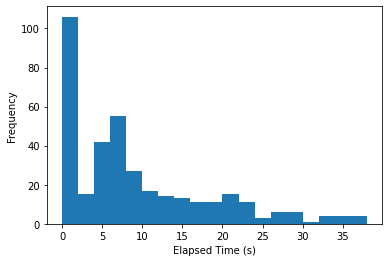

In [9]:
plt.hist(times, bins=range(0, 40, 2))
plt.xlabel('Elapsed Time (s)')
plt.ylabel('Frequency');